In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
import statsmodels.api as smodels
import statsmodels.formula.api as sfa
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


In [2]:
from sklearn.preprocessing import PowerTransformer,StandardScaler

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.shape

(1460, 81)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

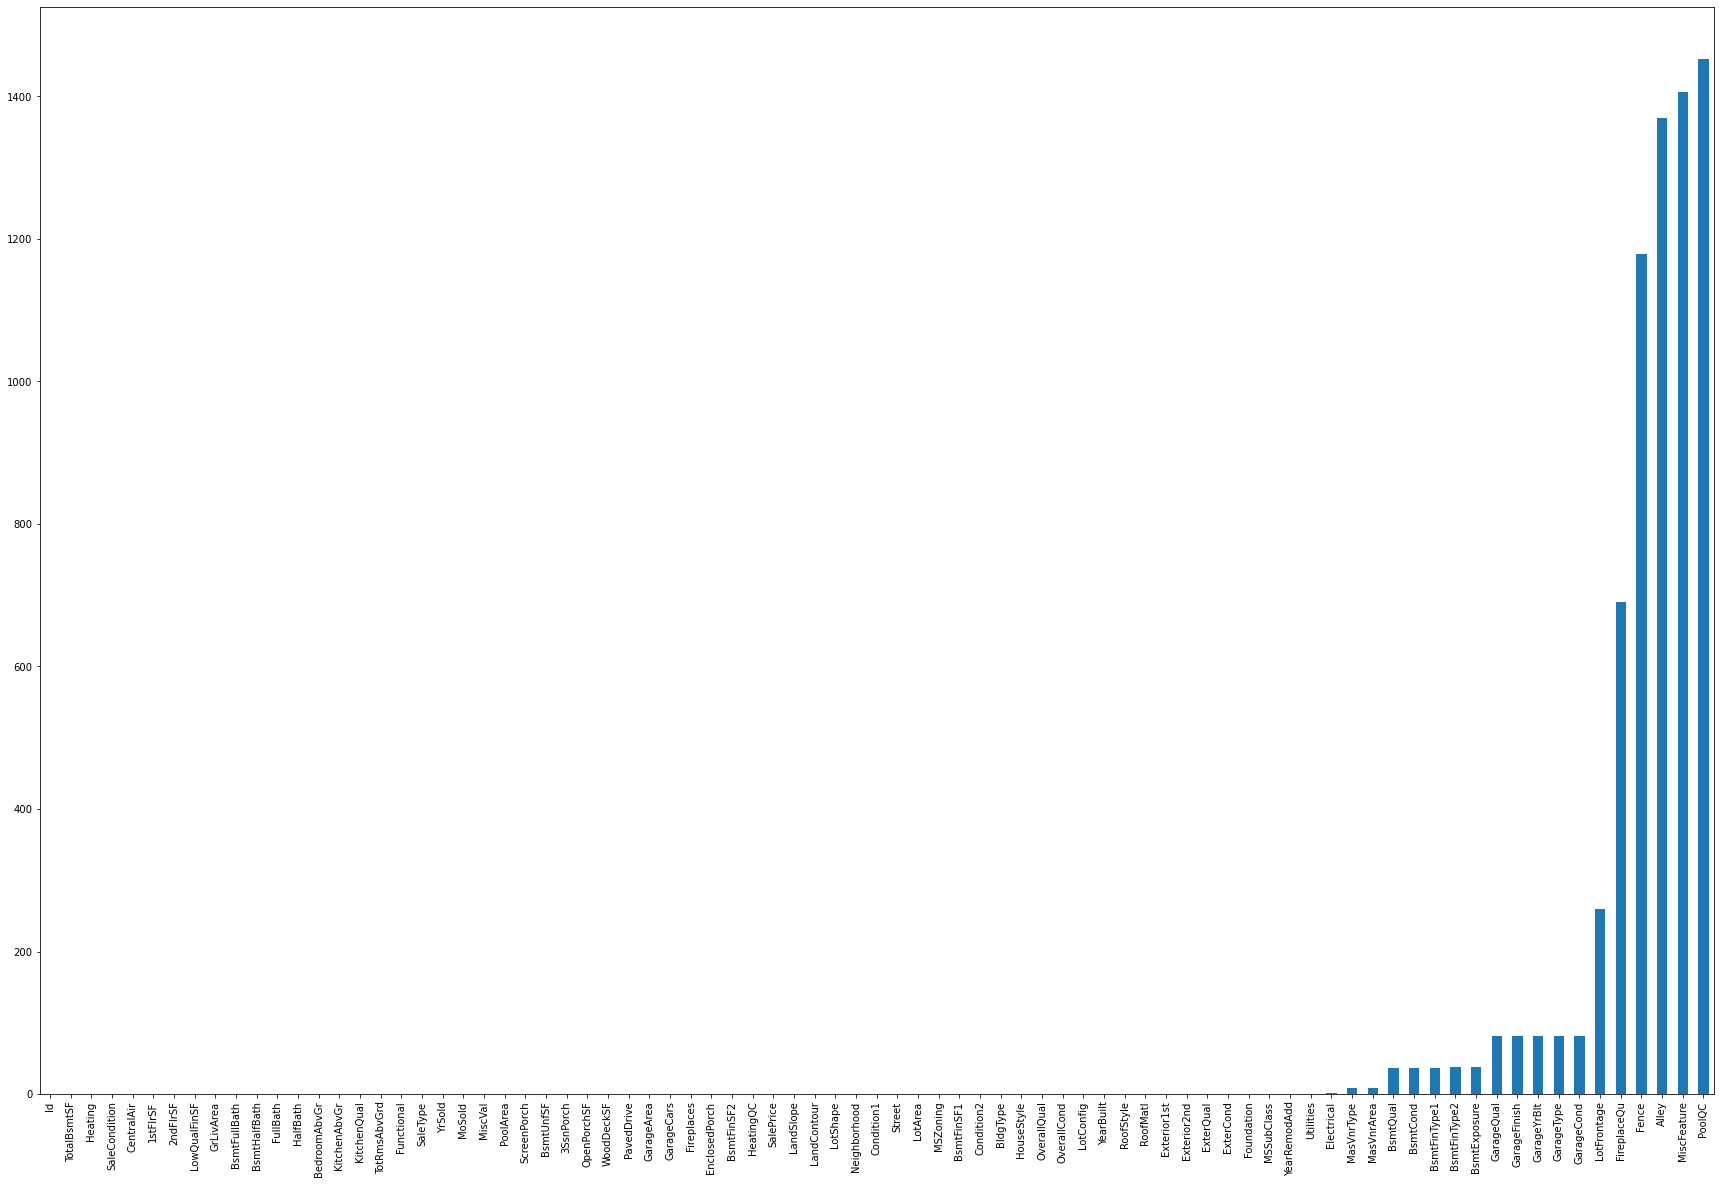

In [9]:
plt.figure(figsize = [30,20])
train.isnull().sum().sort_values().plot(kind = 'bar')
plt.show()

In [10]:
## Based on null values, we see that in four columns, more than 80 % data are missing, so we drop them for our modelling.

In [11]:
train1 = train.drop(['MiscFeature','Fence','PoolQC','Alley'], axis = 1)

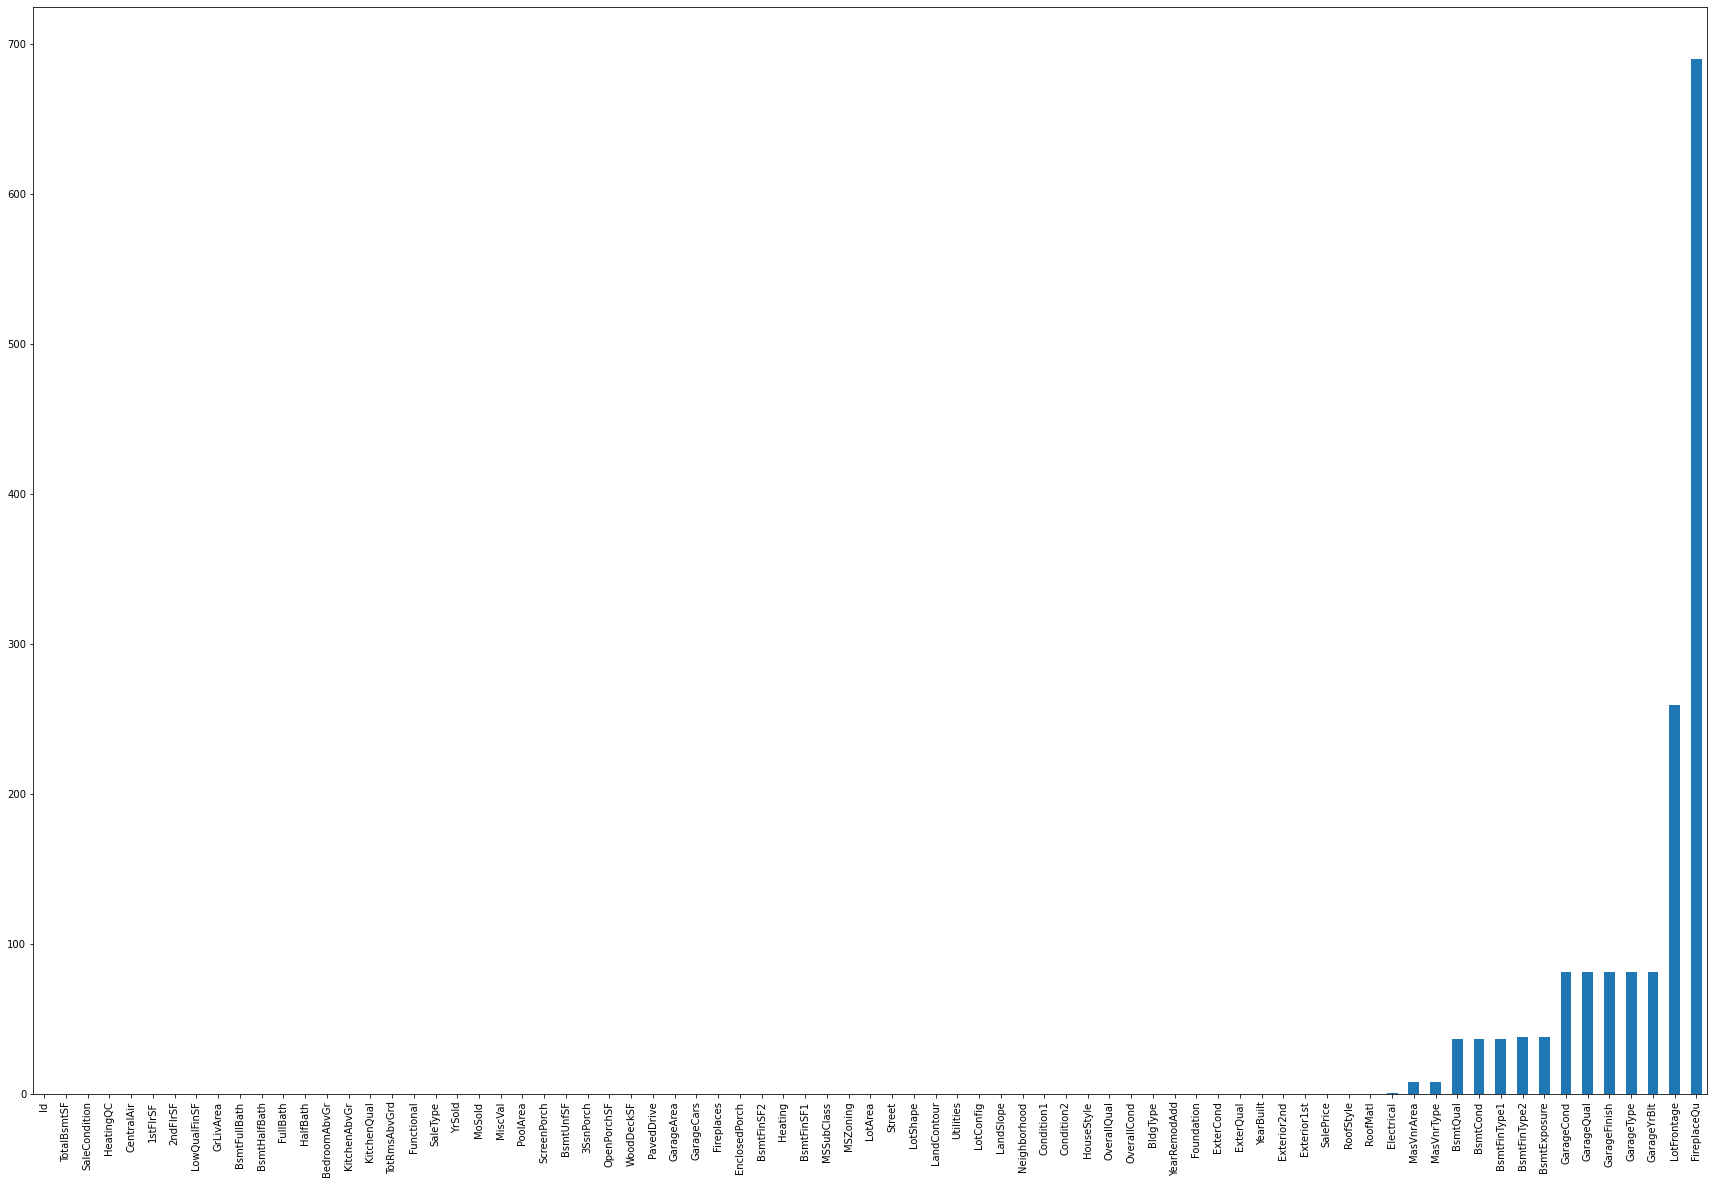

In [12]:
plt.figure(figsize = [30,20])
train1.isnull().sum().sort_values().plot(kind = 'bar')
plt.show()

In [13]:
(train1.isnull().sum().sort_values(ascending = False).head(15)/train1.shape[0])*100  ## % null-values to deal with

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [14]:
train1.std()

Id                 421.610009
MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea  

In [15]:
## Redundant Variables - BsmtFullBath , BsmtHalfBath , FullBath , HalfBath , BedroomAbvGr , KitchenAbvGr, Fireplaces ,GarageCars 

In [16]:
train2 = train1.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars'], axis = 1)

In [17]:
train2.shape

(1460, 69)

In [18]:
train2['MSSubClass'] = train2['MSSubClass'].astype(str)  ## data definition defined as class of property.

In [19]:
num = train2.select_dtypes(include = np.number)
cat = train2.select_dtypes(include = 'object')

In [20]:
num.shape[1]

29

In [21]:
cat.shape[1]

40

### Checking distribution of Numerical Variables

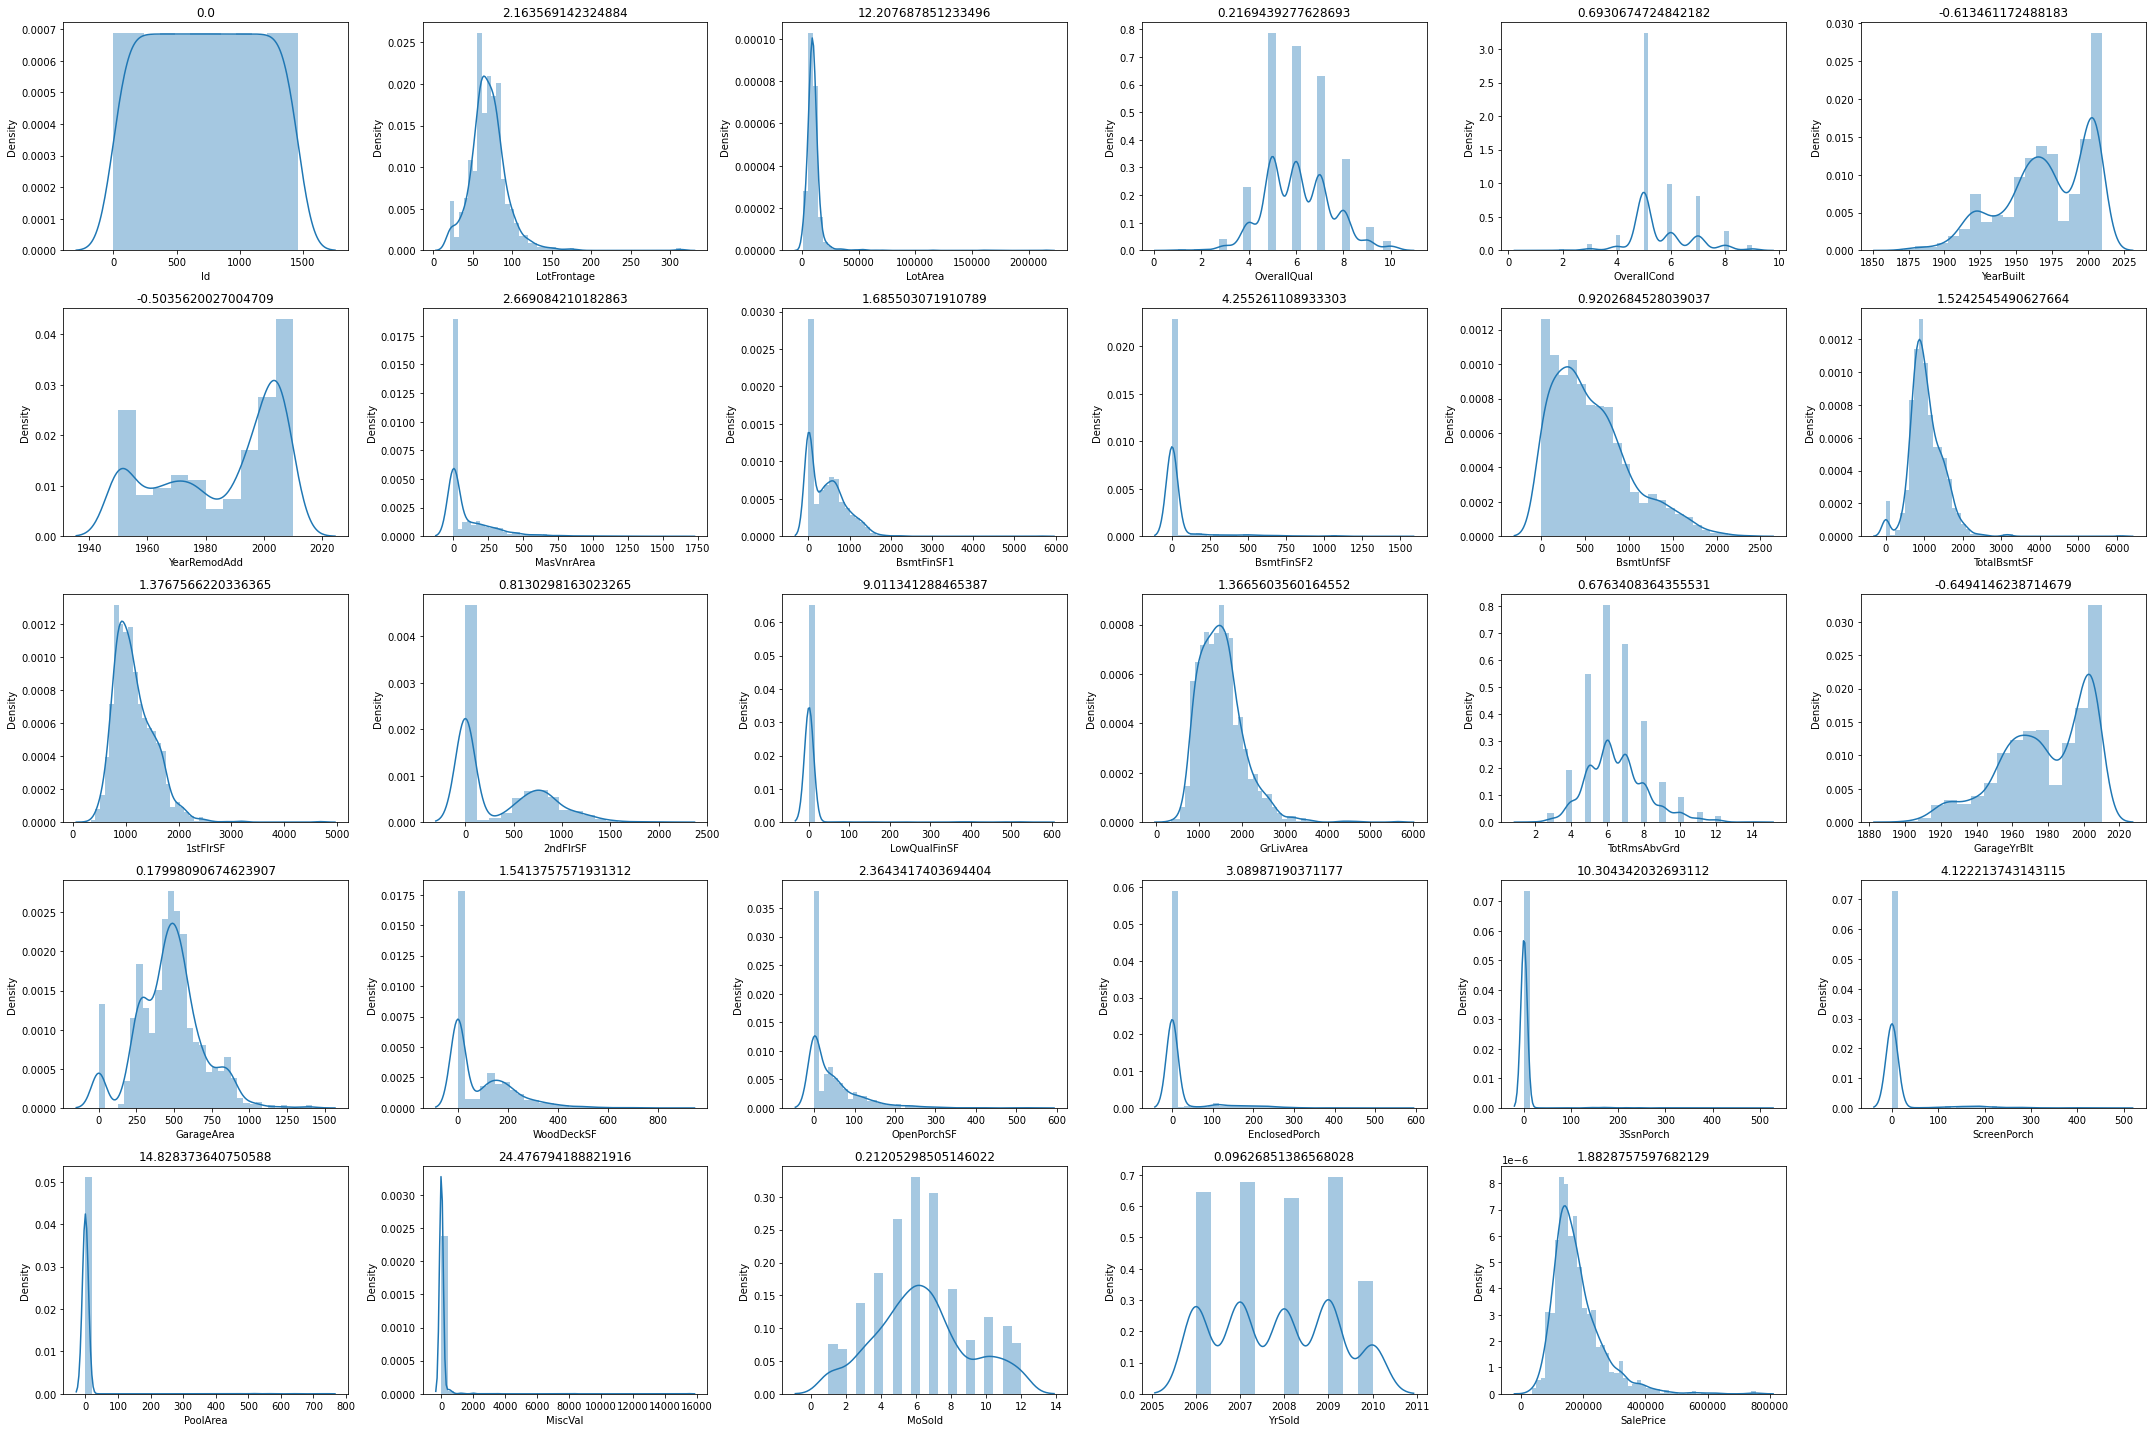

In [22]:
a = 5
b = 6
c = 1

plt.figure(figsize = [30,20])

for i in num.columns :
    plt.subplot(a,b,c)
    plt.title(num[i].skew())
    sns.distplot(num[i])
    c+=1
    
plt.tight_layout()
plt.show()

In [23]:
## Data suffers from skewness, needs desired transformation and scaling

### Checking distribution of Categorical Variables

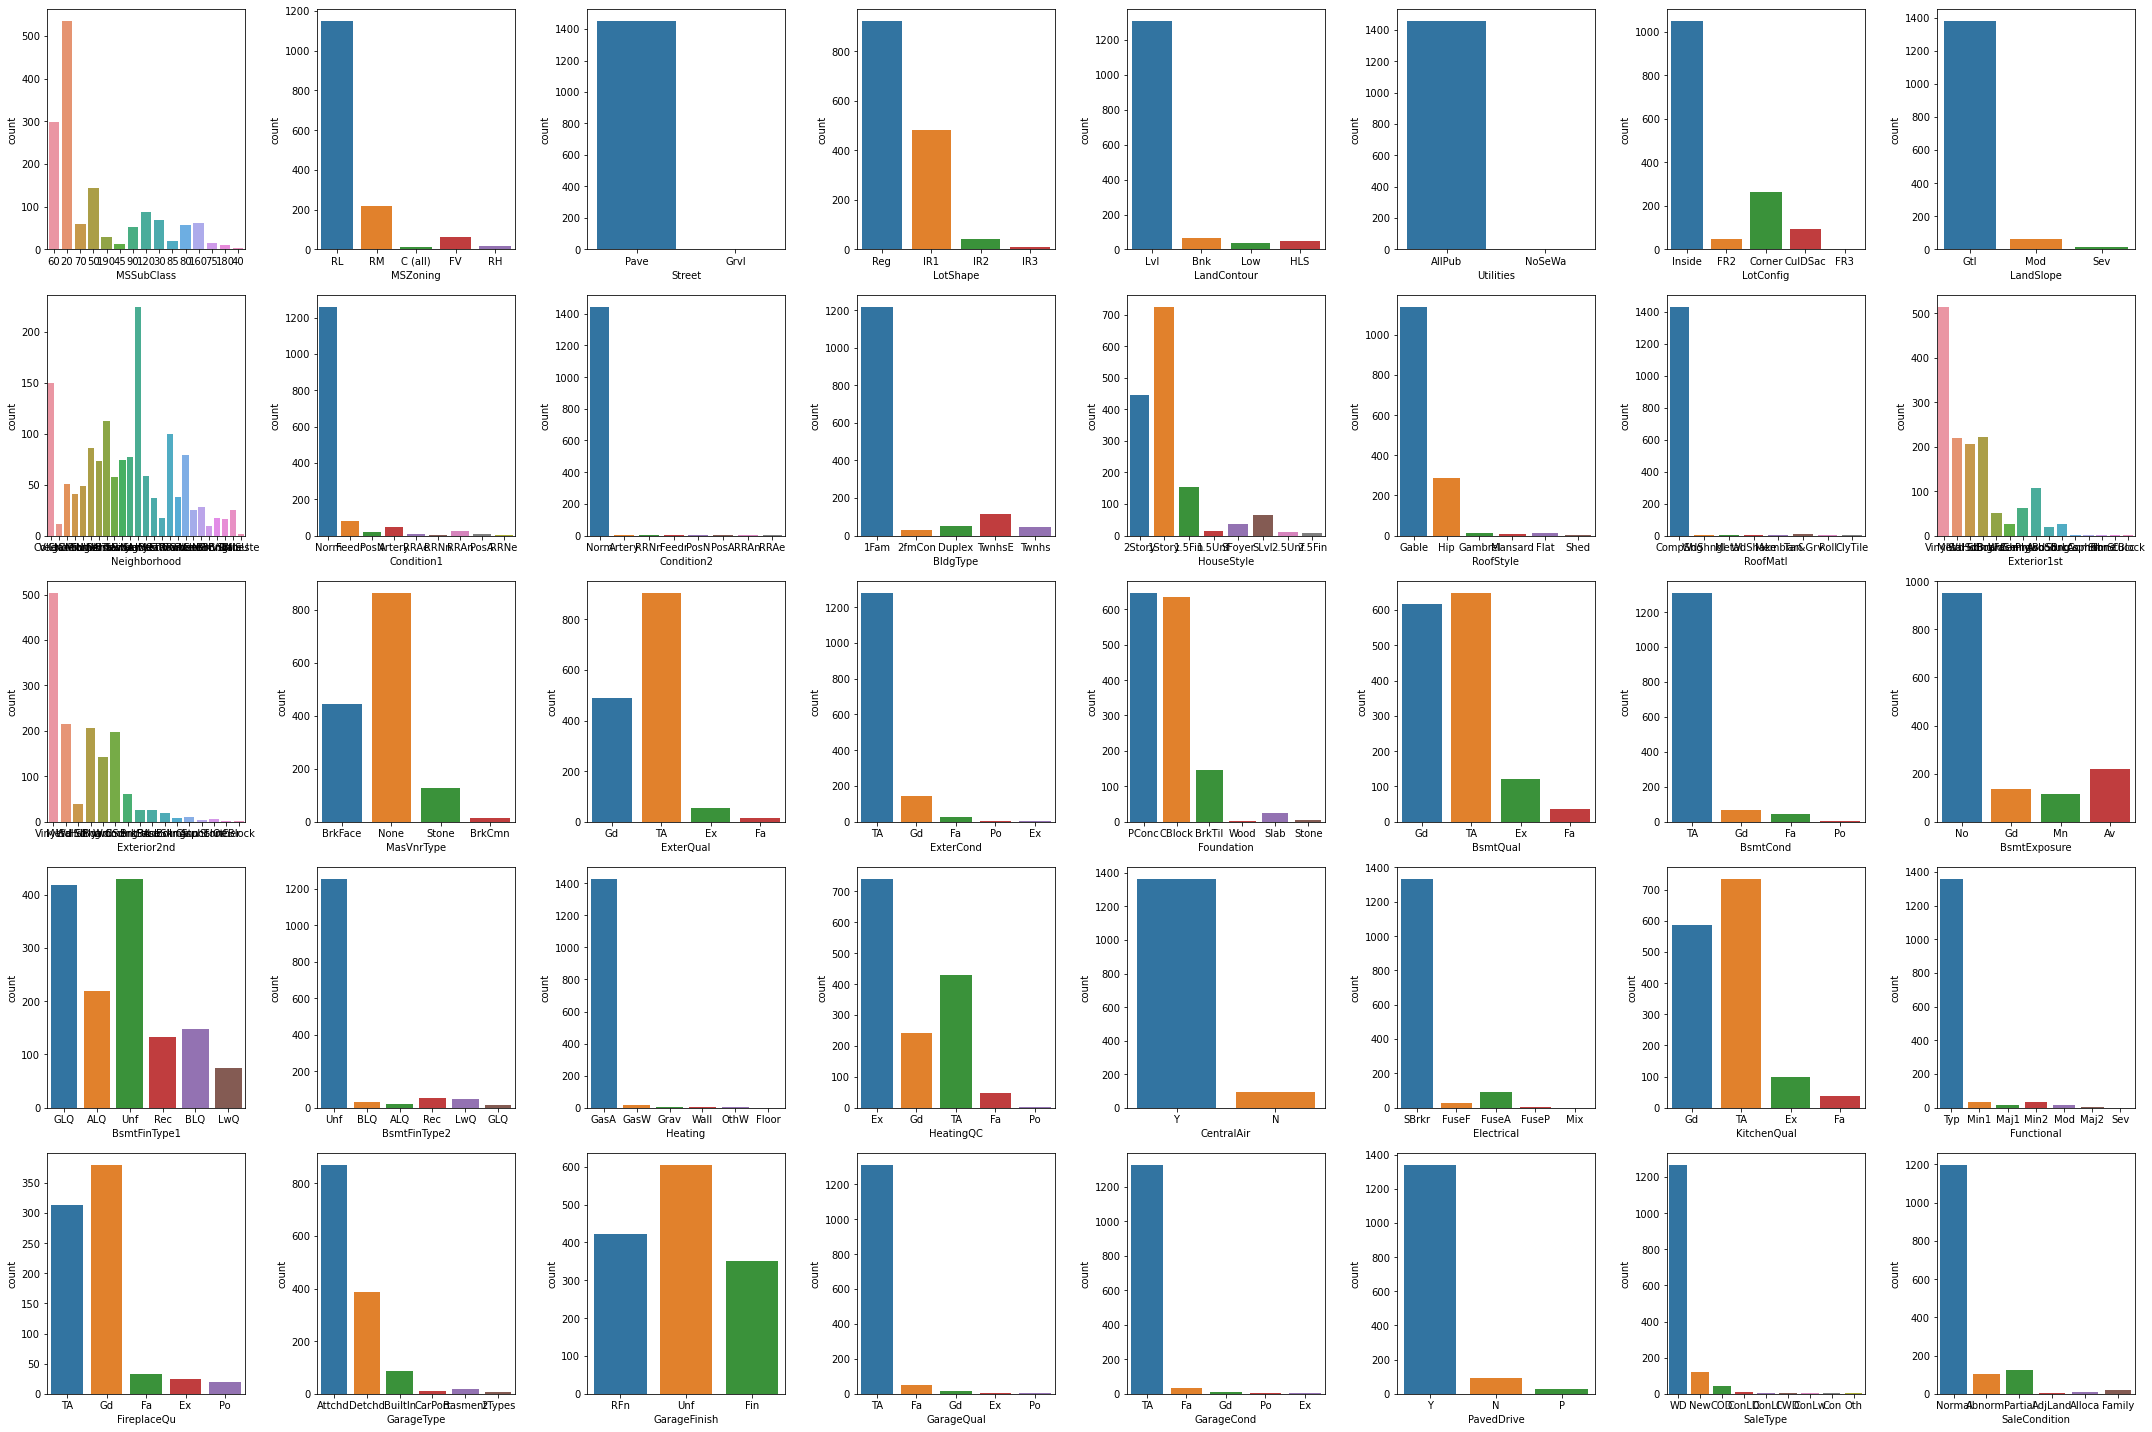

In [24]:
a = 5
b = 8
c = 1

plt.figure(figsize = [30,20])

for i in cat.columns :
    plt.subplot(a,b,c)
    sns.countplot(cat[i])
    c+=1
    
plt.tight_layout()
plt.show()

### Dealing with Missing Values

In [25]:
(train2.isnull().sum().sort_values(ascending = False).head(15)/train2.shape[0])*100

FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [26]:
## Since FireplaceQu has 47% missing values , may need to impute them using Imputation Technique.

In [27]:
train2.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [28]:
m1 = ols('SalePrice~FireplaceQu', data = train2).fit()
anova_lm(m1)          ## Variable seems to be important for target; can't be dropped.

,df,sum_sq,mean_sq,F,PR(>F)
FireplaceQu,4.0,6.561883e+11,1.640471e+11,24.398929,5.016300e-19
Residual,765.0,5.143505e+12,6.723535e+09,NaN,NaN


<AxesSubplot:xlabel='FireplaceQu'>

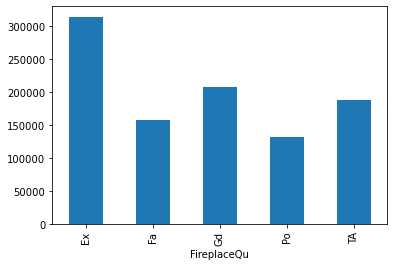

In [29]:
train2.groupby('FireplaceQu')['SalePrice'].median().plot(kind = 'bar')

In [30]:
## Seems like Rating Labels and thus can be intituitively encoded

In [31]:
def fq(x) :
    if x == 'Ex' :
        return(5)
    elif x == 'Fa' :
        return(4)
    elif x == 'Gd' :
        return(3)
    elif x == 'Po' :
        return(2)
    elif x == 'TA' :
        return(1)
    else :
        return(np.nan)
    
    

In [32]:
train2.FireplaceQu = train2.FireplaceQu.map(fq)
train2.FireplaceQu.unique()

array([nan,  1.,  3.,  4.,  5.,  2.])

In [33]:
## Checking Relationship between Lot Frontage and Lot Shape n Lot Config

m2 = ols('LotFrontage~LotShape', data = train2).fit()
anova_lm(m2) 

,df,sum_sq,mean_sq,F,PR(>F)
LotShape,3.0,53109.907000,17703.302333,32.372756,4.038774e-20
Residual,1197.0,654589.095498,546.858058,NaN,NaN


In [34]:
m2 = ols('LotFrontage~LotConfig', data = train2).fit()
anova_lm(m2)

,df,sum_sq,mean_sq,F,PR(>F)
LotConfig,4.0,50377.889920,12594.472480,22.915724,2.888801e-18
Residual,1196.0,657321.112578,549.599592,NaN,NaN


In [35]:
### More relation with Lot Shape
## Thus Median Imputation basis that

In [36]:
train2['LotFrontage'] = train2.groupby('LotShape')['LotFrontage'].transform(lambda x : x.replace(to_replace = np.nan, value = x.median()))

In [37]:
## Missing values of LotFrontage dealt with.

In [38]:
(train2.isnull().sum().sort_values(ascending = False).head(15)/train2.shape[0])*100

FireplaceQu     47.260274
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
ScreenPorch      0.000000
dtype: float64

#### Rest null values are minimalistic in the range upto 5%, can be imputed either by respective median / mode; as it won't add adverse bias.

In [39]:
train2.loc[train2.GarageYrBlt.isna(),'GarageYrBlt'] = 2005.0   ## since year can be treated as a category, unless otherwise used for vintage

In [40]:
train2.loc[train2.GarageType.isna(),'GarageType'] = 'Attchd'

In [41]:
train2.loc[train2.GarageCond.isna(),'GarageCond'] = 'TA'

In [42]:
train2.loc[train2.GarageFinish.isna(),'GarageFinish'] = 'Unf'

In [43]:
train2.loc[train2.GarageQual.isna(),'GarageQual'] = 'TA'

In [44]:
train2.loc[train2.BsmtExposure.isna(),'BsmtExposure'] = 'No'

In [45]:
train2.loc[train2.BsmtFinType2.isna(),'BsmtFinType2'] = 'Unf'

In [46]:
train2.loc[train2.BsmtFinType1.isna(),'BsmtFinType1'] = 'Unf'

In [47]:
train2.loc[train2.BsmtCond.isna(),'BsmtCond'] = 'TA'

In [48]:
train2.loc[train2.BsmtQual.isna(),'BsmtQual'] = 'TA'

In [49]:
train2.loc[train2.MasVnrType.isna(),'MasVnrType'] = 'None'

In [50]:
train2.loc[train2.MasVnrArea.isna(),'MasVnrArea'] = train2.MasVnrArea.median()

In [51]:
train2.loc[train2.Electrical.isna(),'Electrical'] = 'SBrkr'

In [52]:
(train2.isnull().sum().sort_values(ascending = False)/train2.shape[0])*100

FireplaceQu      47.260274
Id                0.000000
LowQualFinSF      0.000000
GarageType        0.000000
Functional        0.000000
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
GrLivArea         0.000000
2ndFlrSF          0.000000
BsmtFinSF2        0.000000
1stFlrSF          0.000000
Electrical        0.000000
CentralAir        0.000000
HeatingQC         0.000000
Heating           0.000000
TotalBsmtSF       0.000000
GarageYrBlt       0.000000
GarageFinish      0.000000
GarageArea        0.000000
GarageQual        0.000000
GarageCond        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
BsmtUnfSF         0.000000
BsmtFinType2      0.000000
MSSubClass        0.000000
LotConfig         0.000000
H

In [53]:
## All the missing values except for FireplaceQu have been dealt with.
## Nulls in FireplaceQu can be imputed using Iterative Imputer.

In [54]:
num2 = train2.select_dtypes(include = np.number)
cat2 = train2.select_dtypes(include = 'object')

### Encoding Categorical Variables

In [55]:
cat2.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [56]:
cat2.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### 1.MS SubClass

In [57]:
cat2['MSSubClass'].unique()         ## seems to be some sort of anonymous rating for class of house/property.

array(['60', '20', '70', '50', '190', '45', '90', '120', '30', '85', '80',
       '160', '75', '180', '40'], dtype=object)

In [58]:
## Converting it into initial int for machine to pick

cat2.MSSubClass = cat2.MSSubClass.astype(int)

#### 2. MSZoning

In [59]:
cat2.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [60]:
train2.groupby('MSZoning')['SalePrice'].median()      ## can be dummy encoded

MSZoning
C (all)     74700
FV         205950
RH         136500
RL         174000
RM         120500
Name: SalePrice, dtype: int64

#### 3.Street

In [61]:
train2.groupby('Street')['SalePrice'].median()      ## Pavement are better.

Street
Grvl    114250
Pave    163000
Name: SalePrice, dtype: int64

In [62]:
cat2.Street = [1 if x == 'Pave' else 0 for x in cat2.Street]
cat2.Street.unique()

array([1, 0], dtype=int64)

#### 4.LotShape

In [63]:
train2.groupby('LotShape')['SalePrice'].median()        ## can be dummy encoded

LotShape
IR1    189000
IR2    221000
IR3    203570
Reg    146000
Name: SalePrice, dtype: int64

#### 5. LandContour

In [64]:
train2.groupby('LandContour')['SalePrice'].median()       ## There is a certain order.

LandContour
Bnk    139400
HLS    222250
Low    190000
Lvl    162900
Name: SalePrice, dtype: int64

In [65]:
def lc(x):
    if x == 'HLS' :
        return(4)
    elif x == 'Low' :
        return(3)
    elif x == 'Lvl' :
        return(2)
    else :
        return(1)

In [66]:
cat2.LandContour = cat2.LandContour.map(lc)
cat2.LandContour.unique()

array([2, 1, 3, 4], dtype=int64)

#### 6. Utilities

In [67]:
train2.groupby('Utilities')['SalePrice'].median()       ## Allpub seems better

Utilities
AllPub    163000
NoSeWa    137500
Name: SalePrice, dtype: int64

In [68]:
cat2.Utilities = [1 if x == 'AllPub' else 0 for x in cat2.Utilities]
cat2.Utilities.unique()

array([1, 0], dtype=int64)

#### 7. LotConfig

In [69]:
train2.groupby('LotConfig')['SalePrice'].median()             ## can be dummy encoded

LotConfig
Corner     160000.0
CulDSac    199262.0
FR2        165000.0
FR3        195450.0
Inside     159697.5
Name: SalePrice, dtype: float64

#### 8. LandSlope

In [70]:
train2.groupby('LandSlope')['SalePrice'].median()            ## can be dummy encoded

LandSlope
Gtl    161875
Mod    186700
Sev    185000
Name: SalePrice, dtype: int64

#### 9.Neighborhood

In [71]:
train2.groupby('Neighborhood')['SalePrice'].median()

Neighborhood
Blmngtn    191000
Blueste    137500
BrDale     106000
BrkSide    124300
ClearCr    200250
CollgCr    197200
Crawfor    200624
Edwards    121750
Gilbert    181000
IDOTRR     103000
MeadowV     88000
Mitchel    153500
NAmes      140000
NPkVill    146000
NWAmes     182900
NoRidge    301500
NridgHt    315000
OldTown    119000
SWISU      139500
Sawyer     135000
SawyerW    179900
Somerst    225500
StoneBr    278000
Timber     228475
Veenker    218000
Name: SalePrice, dtype: int64

In [72]:
## Binning Neighbourhood basis sales price

HP = ['NoRidge','NridgHt','StoneBr']
MP = ['Blmngtn','CollgCr','Crawfor','Gilbert','Mitchel','NWAmes','SawyerW','Somerst','Timber','Veenker']

n = []

for i in cat2.Neighborhood :
    if i in HP :
        n.append('HighPriced_Locality')
    elif i in MP :
        n.append('MediumPriced_Locality')
    else :
        n.append('LowPriced_Locality')
        
cat2['Locality'] = n

def lc(x) :
    if x == 'HighPriced_Locality' :
        return(3)
    elif x == 'MediumPriced_Locality' :
        return(2)
    else :
        return(1)
    
cat2.Locality = cat2.Locality.map(lc)

In [73]:
## New feature based on Locality / Neighbourhood type added
cat2.Locality.unique()

array([2, 3, 1], dtype=int64)

In [74]:
cat2.drop('Neighborhood', axis = 1, inplace = True)

#### 10.Condition1 / Condition2

In [75]:
## can be dummy encoded

#### 11.BldgType

In [76]:
cat2.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [77]:
train2.groupby('BldgType')['SalePrice'].median()           ## May be ordered

BldgType
1Fam      167900
2fmCon    127500
Duplex    135980
Twnhs     137500
TwnhsE    172200
Name: SalePrice, dtype: int64

In [78]:
def bt(x):
    if x == 'TwnhsE' :
        return(5)
    elif x == '1Fam' :
        return(4)
    elif x == 'Twnhs' :
        return(3)
    elif x == 'Duplex' :
        return(2)
    else :
        return(1)
    
cat2.BldgType = cat2.BldgType.map(bt)
cat2.BldgType.unique()

array([4, 1, 2, 5, 3], dtype=int64)

#### 12.HouseStyle

In [79]:
train2.groupby('HouseStyle')['SalePrice'].median()         ## Definitely Ordered.

HouseStyle
1.5Fin    132000
1.5Unf    111250
1Story    154750
2.5Fin    194000
2.5Unf    133900
2Story    190000
SFoyer    135960
SLvl      164500
Name: SalePrice, dtype: int64

In [80]:
def hs(x):
    if x == '2.5Fin' :
        return(8)
    elif x == '2Story' :
        return(7)
    elif x == 'SLvl' :
        return(6)
    elif x == '1Story' :
        return(5)
    elif x == 'SFoyer' :
        return(4)
    elif x == '2.5Unf' :
        return(3)
    elif x == '1.5Fin' :
        return(2)
    else :
        return(1)
    
cat2.HouseStyle = cat2.HouseStyle.map(hs)
cat2.HouseStyle.unique()

array([7, 5, 2, 1, 4, 6, 3, 8], dtype=int64)

#### Columns 'RoofStyle', 'RoofMatl',
                                   'Exterior1st', 'Exterior2nd', 'MasVnrType'
                                   
                                   can be dummy encoded

In [83]:
cat2.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Locality'],
      dtype='object')

In [84]:
cat2.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Locality
0,60,RL,1,Reg,2,1,Inside,Gtl,Norm,Norm,4,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2
1,20,RL,1,Reg,2,1,FR2,Gtl,Feedr,Norm,4,5,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2
2,60,RL,1,IR1,2,1,Inside,Gtl,Norm,Norm,4,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2
3,70,RL,1,IR1,2,1,Corner,Gtl,Norm,Norm,4,7,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,2
4,60,RL,1,IR1,2,1,FR2,Gtl,Norm,Norm,4,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,3


#### 13. Columns with Quality Grading

In [82]:
cat2.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [92]:
train2.groupby('ExterQual')['SalePrice'].median()       ## Ex > Gd > TA > Fa

ExterQual
Ex    364606.5
Fa     82250.0
Gd    220000.0
TA    139450.0
Name: SalePrice, dtype: float64

In [85]:
cat2.ExterCond.unique()                   

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [93]:
train2.groupby('ExterCond')['SalePrice'].median()         ## Ex > Gd > TA > Fa > Po

ExterCond
Ex    161000
Fa     95750
Gd    151250
Po     76500
TA    167370
Name: SalePrice, dtype: int64

In [86]:
cat2.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [94]:
train2.groupby('BsmtQual')['SalePrice'].median()        

BsmtQual
Ex    318000
Fa    112000
Gd    192070
TA    135000
Name: SalePrice, dtype: int64

In [87]:
cat2.BsmtCond.unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [95]:
train2.groupby('BsmtCond')['SalePrice'].median()        

BsmtCond
Fa    118500
Gd    193879
Po     64000
TA    163500
Name: SalePrice, dtype: int64

In [88]:
cat2.HeatingQC.unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [96]:
train2.groupby('HeatingQC')['SalePrice'].median()        

HeatingQC
Ex    194700
Fa    123500
Gd    152000
Po     87000
TA    135000
Name: SalePrice, dtype: int64

In [89]:
cat2.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [90]:
cat2.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [97]:
train2.groupby('GarageQual')['SalePrice'].median()        

GarageQual
Ex    127500
Fa    115000
Gd    209115
Po     96500
TA    165000
Name: SalePrice, dtype: int64

In [91]:
cat2.GarageCond.unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [98]:
### The seen order is Ex > Gd > TA > Fa > Po

def qual(x) :
    if x == 'Ex' :
        return(5)
    elif x == 'Gd' :
        return(4)
    elif x == 'TA' :
        return(3)
    elif x == 'Fa' :
        return(2)
    else :
        return(1)

In [101]:
## Quality Rating Variables  - ExterQual , ExterCond , BsmtQual , BsmtCond , HeatingQC , KitchenQual , GarageQual , GarageCond

In [102]:
cat2.ExterQual = cat2.ExterQual.map(qual)

In [103]:
cat2.ExterCond = cat2.ExterCond.map(qual)

In [104]:
cat2.BsmtQual = cat2.BsmtQual.map(qual)

In [105]:
cat2.BsmtCond = cat2.BsmtCond.map(qual)

In [106]:
cat2.HeatingQC = cat2.HeatingQC.map(qual)

In [107]:
cat2.KitchenQual = cat2.KitchenQual.map(qual)

In [108]:
cat2.GarageQual = cat2.GarageQual.map(qual)

In [109]:
cat2.GarageCond = cat2.GarageCond.map(qual)

#### 14. Foundation

In [110]:
cat2.Foundation.unique()                     

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [111]:
train2.groupby('Foundation')['SalePrice'].median()

Foundation
BrkTil    125250
CBlock    141500
PConc     205000
Slab      104150
Stone     126500
Wood      164000
Name: SalePrice, dtype: int64

In [113]:
train2.groupby(['SaleCondition','Foundation'])['SalePrice'].median()  ## Order - Pconc > Wood > CBlock > Stone > BrkTil > Slab

SaleCondition  Foundation
Abnorml        BrkTil        102250
               CBlock        119950
               PConc         183000
               Stone         102776
AdjLand        BrkTil        126000
               CBlock        127500
               PConc          81500
Alloca         BrkTil         89471
               CBlock        153337
               PConc         206300
               Slab          118964
Family         BrkTil        136000
               CBlock        145000
               PConc         180000
Normal         BrkTil        127500
               CBlock        143000
               PConc         198900
               Slab           98000
               Stone         137000
               Wood          164000
Partial        BrkTil        113000
               CBlock        143000
               PConc         246578
Name: SalePrice, dtype: int64

In [114]:
def fn(x) :
    if x == 'PConc' :
        return(6)
    elif x == 'Wood' :
        return(5)
    elif x == 'CBlock' :
        return(4)
    elif x == 'Stone' :
        return(3)
    elif x == 'BrkTil' :
        return(2)
    else :
        return(1)

In [115]:
cat2.Foundation = cat2.Foundation.map(fn)

#### 15. BsmtExposure

In [116]:
cat2.BsmtExposure.unique()    ## can be dummy encoded ## less info in data dictionary.

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

#### 16. BsmtFinType1 n BsmtFinType2

In [117]:
cat2.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [118]:
cat2.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [119]:
train2.groupby('BsmtFinType1')['SalePrice'].median()

BsmtFinType1
ALQ    149250
BLQ    139100
GLQ    213750
LwQ    139000
Rec    142000
Unf    153900
Name: SalePrice, dtype: int64

In [120]:
train2.groupby('BsmtFinType2')['SalePrice'].median()

BsmtFinType2
ALQ    174900
BLQ    143000
GLQ    203125
LwQ    154000
Rec    148750
Unf    165000
Name: SalePrice, dtype: int64

In [121]:
## Both can be dummy encoded, no specific pattern / order obtained.

#### 17. Heating

In [122]:
cat2.Heating.unique()    ## can be dummy encoded.

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

#### 18. CentralAir

In [123]:
cat2.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [124]:
cat2.CentralAir = [1 if x == 'Y' else 0 for x in cat2.CentralAir]

#### 19.Electrical

In [126]:
cat2.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [127]:
train2.groupby('Electrical')['SalePrice'].median()          ## SBrkr > FuseA > FuseF > FuseP > Mix

Electrical
FuseA    121250
FuseF    115000
FuseP     82000
Mix       67000
SBrkr    170000
Name: SalePrice, dtype: int64

In [128]:
def el(x) :
    if x == 'SBrkr' :
        return(5)
    elif x == 'FuseA' :
        return(4)
    elif x == 'FuseF' :
        return(3)
    elif x == 'FuseP' :
        return(2)
    else :
        return(1)

In [129]:
cat2.Electrical = cat2.Electrical.map(el)

#### 20.Functional

In [130]:
cat2.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [131]:
train2.groupby('Functional')['SalePrice'].median()

Functional
Maj1    140750
Maj2     85000
Min1    139000
Min2    140000
Mod     137900
Sev     129000
Typ     165500
Name: SalePrice, dtype: int64

In [132]:
## Can be dummy encoded.

#### 21. 'GarageType', 'GarageFinish' 

In [133]:
cat2.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [134]:
cat2.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin'], dtype=object)

In [135]:
train2.groupby('GarageType')['SalePrice'].median()       # not enough evidence on pattern ; can be dummy encoded.

GarageType
2Types     159000
Attchd     179900
Basment    148000
BuiltIn    227500
CarPort    108000
Detchd     129500
Name: SalePrice, dtype: int64

In [136]:
train2.groupby('GarageFinish')['SalePrice'].median()   ## Fin > RFn > Unf

GarageFinish
Fin    215000
RFn    190000
Unf    132000
Name: SalePrice, dtype: int64

In [137]:
def gf(x) :
    if x == 'Fin' :
        return(3)
    elif x == 'RFn' :
        return(2)
    else :
        return(1)

In [138]:
cat2.GarageFinish = cat2.GarageFinish.map(gf)

#### 22. Last 3  - 'PavedDrive', 'SaleType', 'SaleCondition'

In [139]:
cat2.PavedDrive.unique()

array(['Y', 'N', 'P'], dtype=object)

In [140]:
train2.groupby('PavedDrive')['SalePrice'].median()   ## Y > P > N

PavedDrive
N    111000
P    132250
Y    168500
Name: SalePrice, dtype: int64

In [141]:
def pd(x) :
    if x == 'Y' :
        return(3)
    elif x == 'P' :
        return(2)
    else :
        return(1)

In [142]:
cat2.PavedDrive = cat2.PavedDrive.map(pd)

In [143]:
cat2.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [144]:
train2.groupby('SaleType')['SalePrice'].median()    ## need more explanation in data dictionary to understand order; can be dummy encoded.

SaleType
COD      139000
CWD      188750
Con      269600
ConLD    140000
ConLI    125000
ConLw    144000
New      247453
Oth      116050
WD       158000
Name: SalePrice, dtype: int64

In [145]:
cat2.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [148]:
train2.groupby('SaleCondition')['SalePrice'].median()    ## need more explanation in data dictionary to understand order; can be dummy encoded.

SaleCondition
Abnorml    130000
AdjLand    104000
Alloca     148145
Family     140500
Normal     160000
Partial    244600
Name: SalePrice, dtype: int64

In [152]:
cat2.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Locality
0,60,RL,1,Reg,2,1,Inside,Gtl,Norm,Norm,4,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,6,4,3,No,GLQ,Unf,GasA,5,1,5,4,Typ,Attchd,2,3,3,3,WD,Normal,2
1,20,RL,1,Reg,2,1,FR2,Gtl,Feedr,Norm,4,5,Gable,CompShg,MetalSd,MetalSd,None,3,3,4,4,3,Gd,ALQ,Unf,GasA,5,1,5,3,Typ,Attchd,2,3,3,3,WD,Normal,2
2,60,RL,1,IR1,2,1,Inside,Gtl,Norm,Norm,4,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,6,4,3,Mn,GLQ,Unf,GasA,5,1,5,4,Typ,Attchd,2,3,3,3,WD,Normal,2
3,70,RL,1,IR1,2,1,Corner,Gtl,Norm,Norm,4,7,Gable,CompShg,Wd Sdng,Wd Shng,None,3,3,2,3,4,No,ALQ,Unf,GasA,4,1,5,4,Typ,Detchd,1,3,3,3,WD,Abnorml,2
4,60,RL,1,IR1,2,1,FR2,Gtl,Norm,Norm,4,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,6,4,3,Av,GLQ,Unf,GasA,5,1,5,4,Typ,Attchd,2,3,3,3,WD,Normal,3


In [153]:
cat2.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Locality'],
      dtype='object')

In [155]:
req_dummy = cat2.iloc[:,[1,3,6,7,8,9,12,13,14,15,16,22,23,24,25,30,31,36,37]]
req_dummy.head()

,MSZoning,LotShape,LotConfig,LandSlope,Condition1,Condition2,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Functional,GarageType,SaleType,SaleCondition
0,RL,Reg,Inside,Gtl,Norm,Norm,Gable,CompShg,VinylSd,VinylSd,BrkFace,No,GLQ,Unf,GasA,Typ,Attchd,WD,Normal
1,RL,Reg,FR2,Gtl,Feedr,Norm,Gable,CompShg,MetalSd,MetalSd,None,Gd,ALQ,Unf,GasA,Typ,Attchd,WD,Normal
2,RL,IR1,Inside,Gtl,Norm,Norm,Gable,CompShg,VinylSd,VinylSd,BrkFace,Mn,GLQ,Unf,GasA,Typ,Attchd,WD,Normal
3,RL,IR1,Corner,Gtl,Norm,Norm,Gable,CompShg,Wd Sdng,Wd Shng,None,No,ALQ,Unf,GasA,Typ,Detchd,WD,Abnorml
4,RL,IR1,FR2,Gtl,Norm,Norm,Gable,CompShg,VinylSd,VinylSd,BrkFace,Av,GLQ,Unf,GasA,Typ,Attchd,WD,Normal


In [156]:
req_dummy.shape[1]

19

In [157]:
cat2.shape[1]

39

In [159]:
rest_cat.shape[1]

20

In [168]:
req_dummy.head()

,MSZoning,LotShape,LotConfig,LandSlope,Condition1,Condition2,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Functional,GarageType,SaleType,SaleCondition
0,RL,Reg,Inside,Gtl,Norm,Norm,Gable,CompShg,VinylSd,VinylSd,BrkFace,No,GLQ,Unf,GasA,Typ,Attchd,WD,Normal
1,RL,Reg,FR2,Gtl,Feedr,Norm,Gable,CompShg,MetalSd,MetalSd,None,Gd,ALQ,Unf,GasA,Typ,Attchd,WD,Normal
2,RL,IR1,Inside,Gtl,Norm,Norm,Gable,CompShg,VinylSd,VinylSd,BrkFace,Mn,GLQ,Unf,GasA,Typ,Attchd,WD,Normal
3,RL,IR1,Corner,Gtl,Norm,Norm,Gable,CompShg,Wd Sdng,Wd Shng,None,No,ALQ,Unf,GasA,Typ,Detchd,WD,Abnorml
4,RL,IR1,FR2,Gtl,Norm,Norm,Gable,CompShg,VinylSd,VinylSd,BrkFace,Av,GLQ,Unf,GasA,Typ,Attchd,WD,Normal


In [170]:
dum  = pd.get_dummies(req_dummy, drop_first = True)

In [171]:
dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [172]:
dum = dum.reset_index(drop= True)
rest_cat = rest_cat.reset_index(drop = True)

In [173]:
encoded = pd.concat([rest_cat,dum], axis = 1)
encoded.head()

,MSSubClass,Street,LandContour,Utilities,BldgType,HouseStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,Locality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,1,2,1,4,7,4,3,6,4,3,5,1,5,4,2,3,3,3,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,1,2,1,4,5,3,3,4,4,3,5,1,5,3,2,3,3,3,2,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,1,2,1,4,7,4,3,6,4,3,5,1,5,4,2,3,3,3,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,1,2,1,4,7,3,3,2,3,4,4,1,5,4,1,3,3,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,1,2,1,4,7,4,3,6,4,3,5,1,5,4,2,3,3,3,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [174]:
encoded.shape

(1460, 134)

### Preparing Data For Imputation

In [175]:
num2.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,8,NaN,2003.0,548,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,6,1.0,1976.0,460,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,6,1.0,2001.0,608,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,7,3.0,1998.0,642,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,9,1.0,2000.0,836,192,84,0,0,0,0,0,12,2008,250000


In [176]:
num2 = num2.reset_index(drop = True)

In [177]:
data = pd.concat([num2,encoded], axis = 1)
data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass,Street,LandContour,Utilities,BldgType,HouseStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,Locality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,8,NaN,2003.0,548,0,61,0,0,0,0,0,2,2008,208500,60,1,2,1,4,7,4,3,6,4,3,5,1,5,4,2,3,3,3,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,6,1.0,1976.0,460,298,0,0,0,0,0,0,5,2007,181500,20,1,2,1,4,5,3,3,4,4,3,5,1,5,3,2,3,3,3,2,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,6,1.0,2001.0,608,0,42,0,0,0,0,0,9,2008,223500,60,1,2,1,4,7,4,3,6,4,3,5,1,5,4,2,3,3,3,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,7,3.0,1998.0,642,0,35,272,0,0,0,0,2,2006,140000,70,1,2,1,4,7,3,3,2,3,4,4,1,5,4,1,3,3,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,49

In [178]:
it = IterativeImputer(estimator = KNeighborsRegressor())

x = it.fit_transform(data)

imputed = pd.DataFrame(x, columns = data.columns)

imputed.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass,Street,LandContour,Utilities,BldgType,HouseStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,Locality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,8.0,1.8,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,60.0,1.0,2.0,1.0,4.0,7.0,4.0,3.0,6.0,4.0,3.0,5.0,1.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,6.0,1.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,20.0,1.0,2.0,1.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,5.0,1.0,5.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,6.0,1.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.

In [179]:
imputed.isnull().sum()

Id                       0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
TotRmsAbvGrd             0
FireplaceQu              0
GarageYrBlt              0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
SalePrice                0
MSSubClass               0
Street                   0
LandContour              0
Utilities                0
BldgType                 0
HouseStyle               0
ExterQual                0
E

### Null Values have been dealt with as well as Categorical Data have been tactfully encoded as per buisness sense

### Checking for Outliers

In [180]:
num2.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,8,NaN,2003.0,548,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,6,1.0,1976.0,460,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,6,1.0,2001.0,608,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,7,3.0,1998.0,642,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,9,1.0,2000.0,836,192,84,0,0,0,0,0,12,2008,250000


In [181]:
imputed.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass,Street,LandContour,Utilities,BldgType,HouseStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,Locality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,8.0,1.8,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,60.0,1.0,2.0,1.0,4.0,7.0,4.0,3.0,6.0,4.0,3.0,5.0,1.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,6.0,1.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,20.0,1.0,2.0,1.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,5.0,1.0,5.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,6.0,1.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.

In [182]:
imputed.FireplaceQu.nunique()

15

In [184]:
num2.FireplaceQu.unique()

array([nan,  1.,  3.,  4.,  5.,  2.])

In [185]:
## Treating FireplaceQu after imputation

def fq(x) :
    if x<1 :
        return(1)
    elif (x >=1) & (x<1.5) :
        return(1)
    elif (x>=1.5) & (x<2) :
        return(2)
    elif (x>=2) & (x<2.5) :
        return(2)
    elif (x>=2.5) & (x<3) :
        return(3)
    elif (x>=3) & (x<3.5) :
        return(3)
    elif (x>=3.5) & (x<4):
        return(4)
    elif (x>=4) & (x<4.5) :
        return(4)
    else :
        return(5)

In [186]:
imputed.FireplaceQu = imputed.FireplaceQu.map(fq)
imputed.FireplaceQu.nunique()

5

In [187]:
imp = imputed.drop('FireplaceQu', axis = 1)
imp['FireplaceQu'] = imputed.FireplaceQu
imp.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass,Street,LandContour,Utilities,BldgType,HouseStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,Locality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu
0,1.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,8.0,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,60.0,1.0,2.0,1.0,4.0,7.0,4.0,3.0,6.0,4.0,3.0,5.0,1.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
1,2.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,6.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,20.0,1.0,2.0,1.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,5.0,1.0,5.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,3.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,6.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,60.0,1

In [188]:
## Droping the redundant 'Id' column.

imp.drop('Id', axis = 1, inplace = True)

In [191]:
numerical = imp.iloc[:,:28]
numerical.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,8.0,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,6.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,6.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,7.0,1998.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,9.0,2000.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


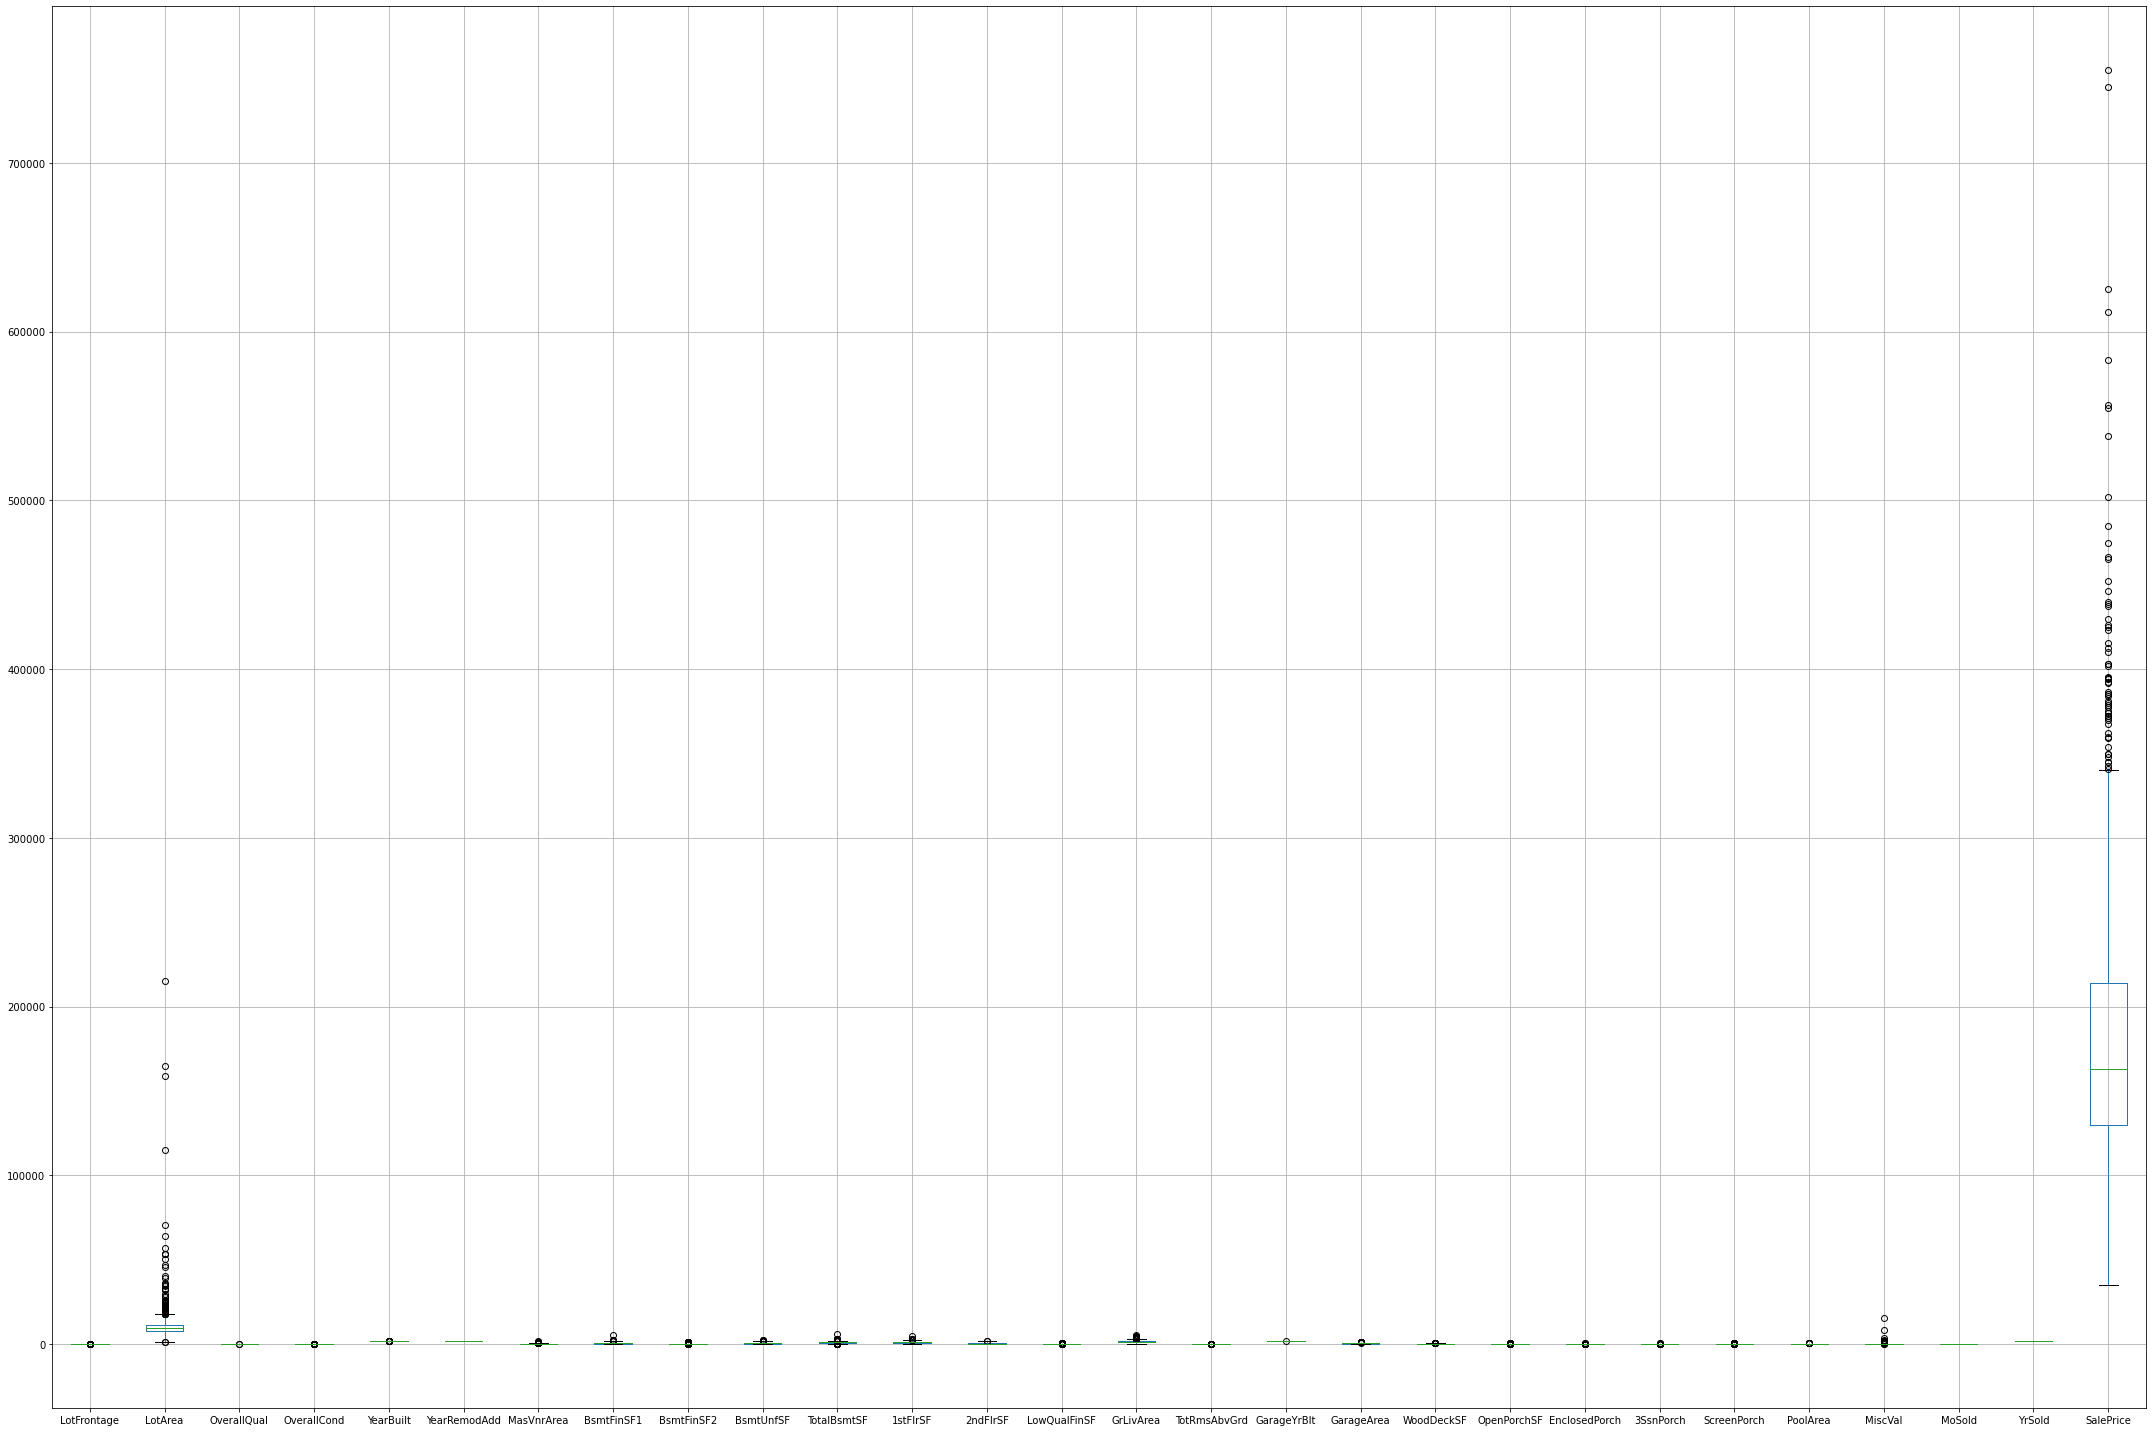

In [192]:
plt.figure(figsize = [30,20])
numerical.boxplot()
plt.tight_layout()
plt.show()

In [195]:
## Most Outliers in SalePrice followed by Lot Area.
## Eliminating them might lead to loss in data

imp.shape

(1460, 163)

In [194]:
q1 = imp.quantile(0.25)
q3 = imp.quantile(0.75)
IQR = q3 - q1

df_wo = imp[~((imp<q1-1.5*IQR) | (imp>q3+1.5*IQR)).any(axis = 1)]
df_wo.shape    

(65, 163)

In [196]:
## Since 95% data is lost, obviously we won't remove Outliers via IQR.

In [197]:
numerical.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,8.0,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,6.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,6.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,7.0,1998.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,9.0,2000.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


### Feature Engineering Vintage of House before Selling both with and without renovation

In [198]:
numerical['Age'] = numerical.YrSold - numerical.YearBuilt
numerical['Renovated_Age'] = numerical.YrSold - numerical.YearRemodAdd
numerical.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,Renovated_Age
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,8.0,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,5.0,5.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,6.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,31.0,31.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,6.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,7.0,6.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,7.0,1998.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,91.0,36.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,9.0,2000.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,8.0,8.0


In [199]:
categorical = imp.iloc[:,28:]
categorical.head()

,MSSubClass,Street,LandContour,Utilities,BldgType,HouseStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,Locality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu
0,60.0,1.0,2.0,1.0,4.0,7.0,4.0,3.0,6.0,4.0,3.0,5.0,1.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
1,20.0,1.0,2.0,1.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,5.0,1.0,5.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,60.0,1.0,2.0,1.0,4.0,7.0,4.0,3.0,6.0,4.0,3.0,5.0,1.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,70.0,1.0,2.0,1.0,4.0,7.0,3.0,3.0,2.0,3.0,4.0,4.0,1.0,5.0,4.0,1.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

### Using PT and SC to treat Numerical Variables

In [200]:
pt = PowerTransformer()

x1 = pt.fit_transform(numerical)

pt_num = pd.DataFrame(x1, columns = numerical.columns)

In [201]:
sc = StandardScaler()

x2 = sc.fit_transform(pt_num)

scaled = pd.DataFrame(x2, columns = pt_num.columns)

In [202]:
scaled.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,Renovated_Age
0,-0.166103,-0.141171,0.667499,-0.477387,1.151867,0.908055,1.230708,0.797537,-0.359384,-0.887576,-0.404029,-0.799624,1.170239,-0.134652,0.528531,0.946380,1.009508,0.383899,-0.950337,0.841820,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-1.694229,0.140029,0.571155,-1.099088,-0.752653
1,0.516734,0.105609,-0.042192,2.011352,0.006695,-0.621670,-0.818452,1.011471,-0.359384,-0.434388,0.508177,0.429151,-0.871454,-0.134652,-0.382755,-0.234627,-0.371447,-0.004602,1.213714,-1.071307,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-0.444891,-0.613739,0.227627,0.119351,0.645629
2,-0.022825,0.413721,0.667499,-0.477387,1.055357,0.835594,1.193873,0.571325,-0.359384,-0.048083,-0.253787,-0.568533,1.172896,-0.134652,0.659112,-0.234627,0.885024,0.641990,-0.950337,0.668453,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,0.987490,0.140029,0.741869,-0.942898,-0.649602
3,-0.413571,0.095490,0.667499,-0.477387,-1.629540,-0.863478,-0.818452,0.142272,-0.359384,0.183337,-0.644806,-0.429428,1.146834,-0.134652,0.540797,0.389921,0.705742,0.786092,-0.950337,0.584540,2.456640,-0.129279,-0.293785,-0.069409,-0.192177,-1.694229,-1.368898,-0.425386,1.426823,0.800808
4,0.686146,0.877127,1.350924,-0.477387,1.007861,0.694898,1.333038,0.750541,-0.359384,0.077485,0.254387,0.124698,1.209630,-0.134652,1.282894,1.448615,0.824286,1.583257,1.079695,0.991895,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,1.963461,0.140029,1.015293,-0.873619,-0.471720


### Preparing Data

In [203]:
scaled = scaled.reset_index(drop = True)
categorical = categorical.reset_index(drop = True)
numerical = numerical.reset_index(drop = True)

In [204]:
final_scaled = pd.concat([scaled,categorical], axis = 1)
final_scaled.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,Renovated_Age,MSSubClass,Street,LandContour,Utilities,BldgType,HouseStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,Locality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu
0,-0.166103,-0.141171,0.667499,-0.477387,1.151867,0.908055,1.230708,0.797537,-0.359384,-0.887576,-0.404029,-0.799624,1.170239,-0.134652,0.528531,0.946380,1.009508,0.383899,-0.950337,0.841820,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-1.694229,0.140029,0.571155,-1.099088,-0.752653,60.0,1.0,2.0,1.0,4.0,7.0,4.0,3.0,6.0,4.0,3.0,5.0,1.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
1,0.516734,0.105609,-0.042192,2.011352,0.006695,-0.621670,-0.818452,1.011471,-0.359384,-0.434388,0.508177,0.429151,-0.871454,-0.134652,-0.382755,-0.234627,-0.371447,-0.004602,1.213714,-1.071307,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-0.444891,-0.613739,0.227627,0.119351,0.645629,20.0,1.0,2.0,1.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,5.0,1.0,5.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [205]:
final_scaled.shape

(1460, 165)

In [206]:
final2 = pd.concat([numerical,categorical], axis = 1)
final2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,Renovated_Age,MSSubClass,Street,LandContour,Utilities,BldgType,HouseStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,Locality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,8.0,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,5.0,5.0,60.0,1.0,2.0,1.0,4.0,7.0,4.0,3.0,6.0,4.0,3.0,5.0,1.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,6.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,31.0,31.0,20.0,1.0,2.0,1.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,5.0,1.0,5.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,6.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2

In [207]:
final2.shape

(1460, 165)

### Splitting Data for Base Model

In [208]:
X = final_scaled.drop('SalePrice', axis = 1)
y = final_scaled.SalePrice

In [209]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [210]:
lr = LinearRegression()

lr.fit(xtrain,ytrain)

LinearRegression()

In [211]:
pred_lr = lr.predict(xtest)

In [217]:
results = pd.DataFrame(columns = ['Model','R2','RMSE'])

In [228]:
results = results.append(pd.Series({'Model':'Base_LR','R2':r2_score(ytest,pred_lr),'RMSE':np.sqrt(mean_squared_error(ytest,pred_lr))}), ignore_index = True)

In [219]:
## Pathetic  Base Model with All Features. Need to apply Feature Selection Methods to improve results

In [220]:
lr = LinearRegression()

sf = sfs(estimator = lr,k_features = 'best',forward = True, scoring = 'r2',cv = 5)

sf.fit(xtrain,ytrain)

print('Best Features are ', '\n', sf.k_feature_names_, '\n')

print('R2 Scores are ', '\n', sf.k_score_ , '\n')

Best Features are  
 ('LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'Street', 'LandContour', 'Utilities', 'BldgType', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive', 'Locality', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'LandSlope_Mod', 'Condition1_Norm', 'Condition1_RRAn', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard', 'BsmtExposure_No', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Functional_Maj2', 'Functional_Typ', 'GarageType_Basment', 'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_Normal', 'FireplaceQu') 

R2 Scores are  
 0.8931941812916253 



In [221]:
## Building LR model basis SFS best features with 54 features.

In [222]:
X1 = final_scaled.loc[:,['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'Street', 'LandContour', 'Utilities', 'BldgType', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive', 'Locality', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'LandSlope_Mod', 'Condition1_Norm', 'Condition1_RRAn', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard', 'BsmtExposure_No', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Functional_Maj2', 'Functional_Typ', 'GarageType_Basment', 'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_Normal', 'FireplaceQu']]
X1.shape

(1460, 54)

In [223]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y,test_size = 0.3, random_state = 10)

In [224]:
lr2 = LinearRegression()

lr2.fit(x1_train,y1_train)

LinearRegression()

In [225]:
pred_lr2 = lr2.predict(x1_test)

In [229]:
results = results.append(pd.Series({'Model':'LR_Sfs','R2':r2_score(y1_test,pred_lr2),'RMSE':np.sqrt(mean_squared_error(y1_test,pred_lr2))}), ignore_index = True)

In [230]:
results

,Model,R2,RMSE
0,Base_LR,-5.677966,2.658778
1,LR_Sfs,0.913272,0.302998


In [231]:
## Selecting Best Features Significantly Improved the Model Performance

### Applying Gradient Descent

In [232]:
sgd = SGDRegressor()

sgd.fit(x1_train,y1_train)

SGDRegressor()

In [233]:
pred_sgd = sgd.predict(x1_test)

In [234]:
results = results.append(pd.Series({'Model':'SGD','R2':r2_score(y1_test,pred_sgd),'RMSE':np.sqrt(mean_squared_error(y1_test,pred_sgd))}), ignore_index = True)

In [235]:
results

,Model,R2,RMSE
0,Base_LR,-5.677966,2.658778
1,LR_Sfs,0.913272,0.302998
2,SGD,0.892000,0.338120


#### Tuning SGD - 2 parameters - 1.alpha ; 2.l1_ratio

In [236]:
## Plotting Validation Curves

#### 1.alpha

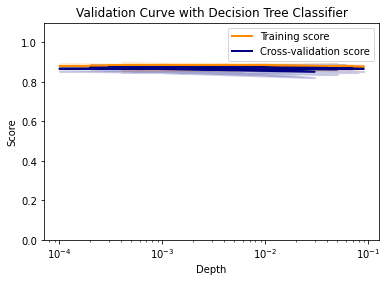

In [237]:
from sklearn.model_selection import validation_curve
param_range = [0.01,0.001,0.0001,0.02,0.002,0.0002,0.03,0.003,0.0003,0.04,0.004,0.0004,0.05,0.005,0.0005,0.06,0.006,0.0006,0.07,0.007,0.0007,0.08,0.008,0.0008,0.09,0.009,0.0009]
train_scores, test_scores = validation_curve(
    SGDRegressor(), x1_train,y1_train, param_name="alpha",scoring='r2',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### 2.l1_ratio

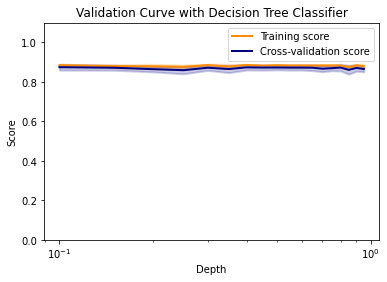

In [238]:
from sklearn.model_selection import validation_curve
param_range = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
train_scores, test_scores = validation_curve(
    SGDRegressor(), x1_train,y1_train, param_name="l1_ratio",scoring='r2',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [239]:
## Since Validation Curves are almost parallel, let's use the same parameters to tune and let model predict the best hyperparameters.

In [241]:
tuned = [{'alpha':[0.01,0.001,0.0001,0.02,0.002,0.0002,0.03,0.003,0.0003,0.04,0.004,0.0004,0.05,0.005,0.0005,0.06,0.006,0.0006,0.07,0.007,0.0007,0.08,0.008,0.0008,0.09,0.009,0.0009],
         'l1_ratio':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]}]

grid = GridSearchCV(estimator = SGDRegressor(), param_grid = tuned, scoring = 'r2', cv = 5 )

grid.fit(x1_train,y1_train)

grid.best_params_

{'alpha': 0.005, 'l1_ratio': 0.2}

In [242]:
sgd2 = SGDRegressor(alpha = 0.005 , l1_ratio = 0.2)

sgd2.fit(x1_train,y1_train)

SGDRegressor(alpha=0.005, l1_ratio=0.2)

In [243]:
pred_sgd2 = sgd2.predict(x1_test)

In [244]:
results = results.append(pd.Series({'Model':'SGD_tuned','R2':r2_score(y1_test,pred_sgd2),'RMSE':np.sqrt(mean_squared_error(y1_test,pred_sgd2))}), ignore_index = True)

In [245]:
results

,Model,R2,RMSE
0,Base_LR,-5.677966,2.658778
1,LR_Sfs,0.913272,0.302998
2,SGD,0.892000,0.338120
3,SGD_tuned,0.892136,0.337907


In [246]:
## We see LR is still doing a better job to SGD.

### Checking with Ensemble Models

In [247]:
X_new = final2.drop('SalePrice', axis = 1)
y_new = final2.SalePrice

In [248]:
X_train,X_test,y_train,y_test = train_test_split(X_new , y_new , test_size = 0.3 , random_state = 10)

In [249]:
dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [250]:
pred_dt = dt.predict(X_test)

In [251]:
results = results.append(pd.Series({'Model':'DT','R2':r2_score(y1_test,pred_dt),'RMSE':np.sqrt(mean_squared_error(y1_test,pred_dt))}), ignore_index = True)

In [252]:
results

,Model,R2,RMSE
0,Base_LR,-5.677966e+00,2.658778
1,LR_Sfs,9.132721e-01,0.302998
2,SGD,8.920004e-01,0.338120
3,SGD_tuned,8.921363e-01,0.337907
4,DT,-3.470255e+10,191664.044551


In [253]:
## We see that Ensemble Models are having pathetic performance starting with DT.

In [254]:
## We can thus settle with Linear Regression Model with 54 best features doing a great job along with SGD

### Checking Feature / Co-efficient Importances

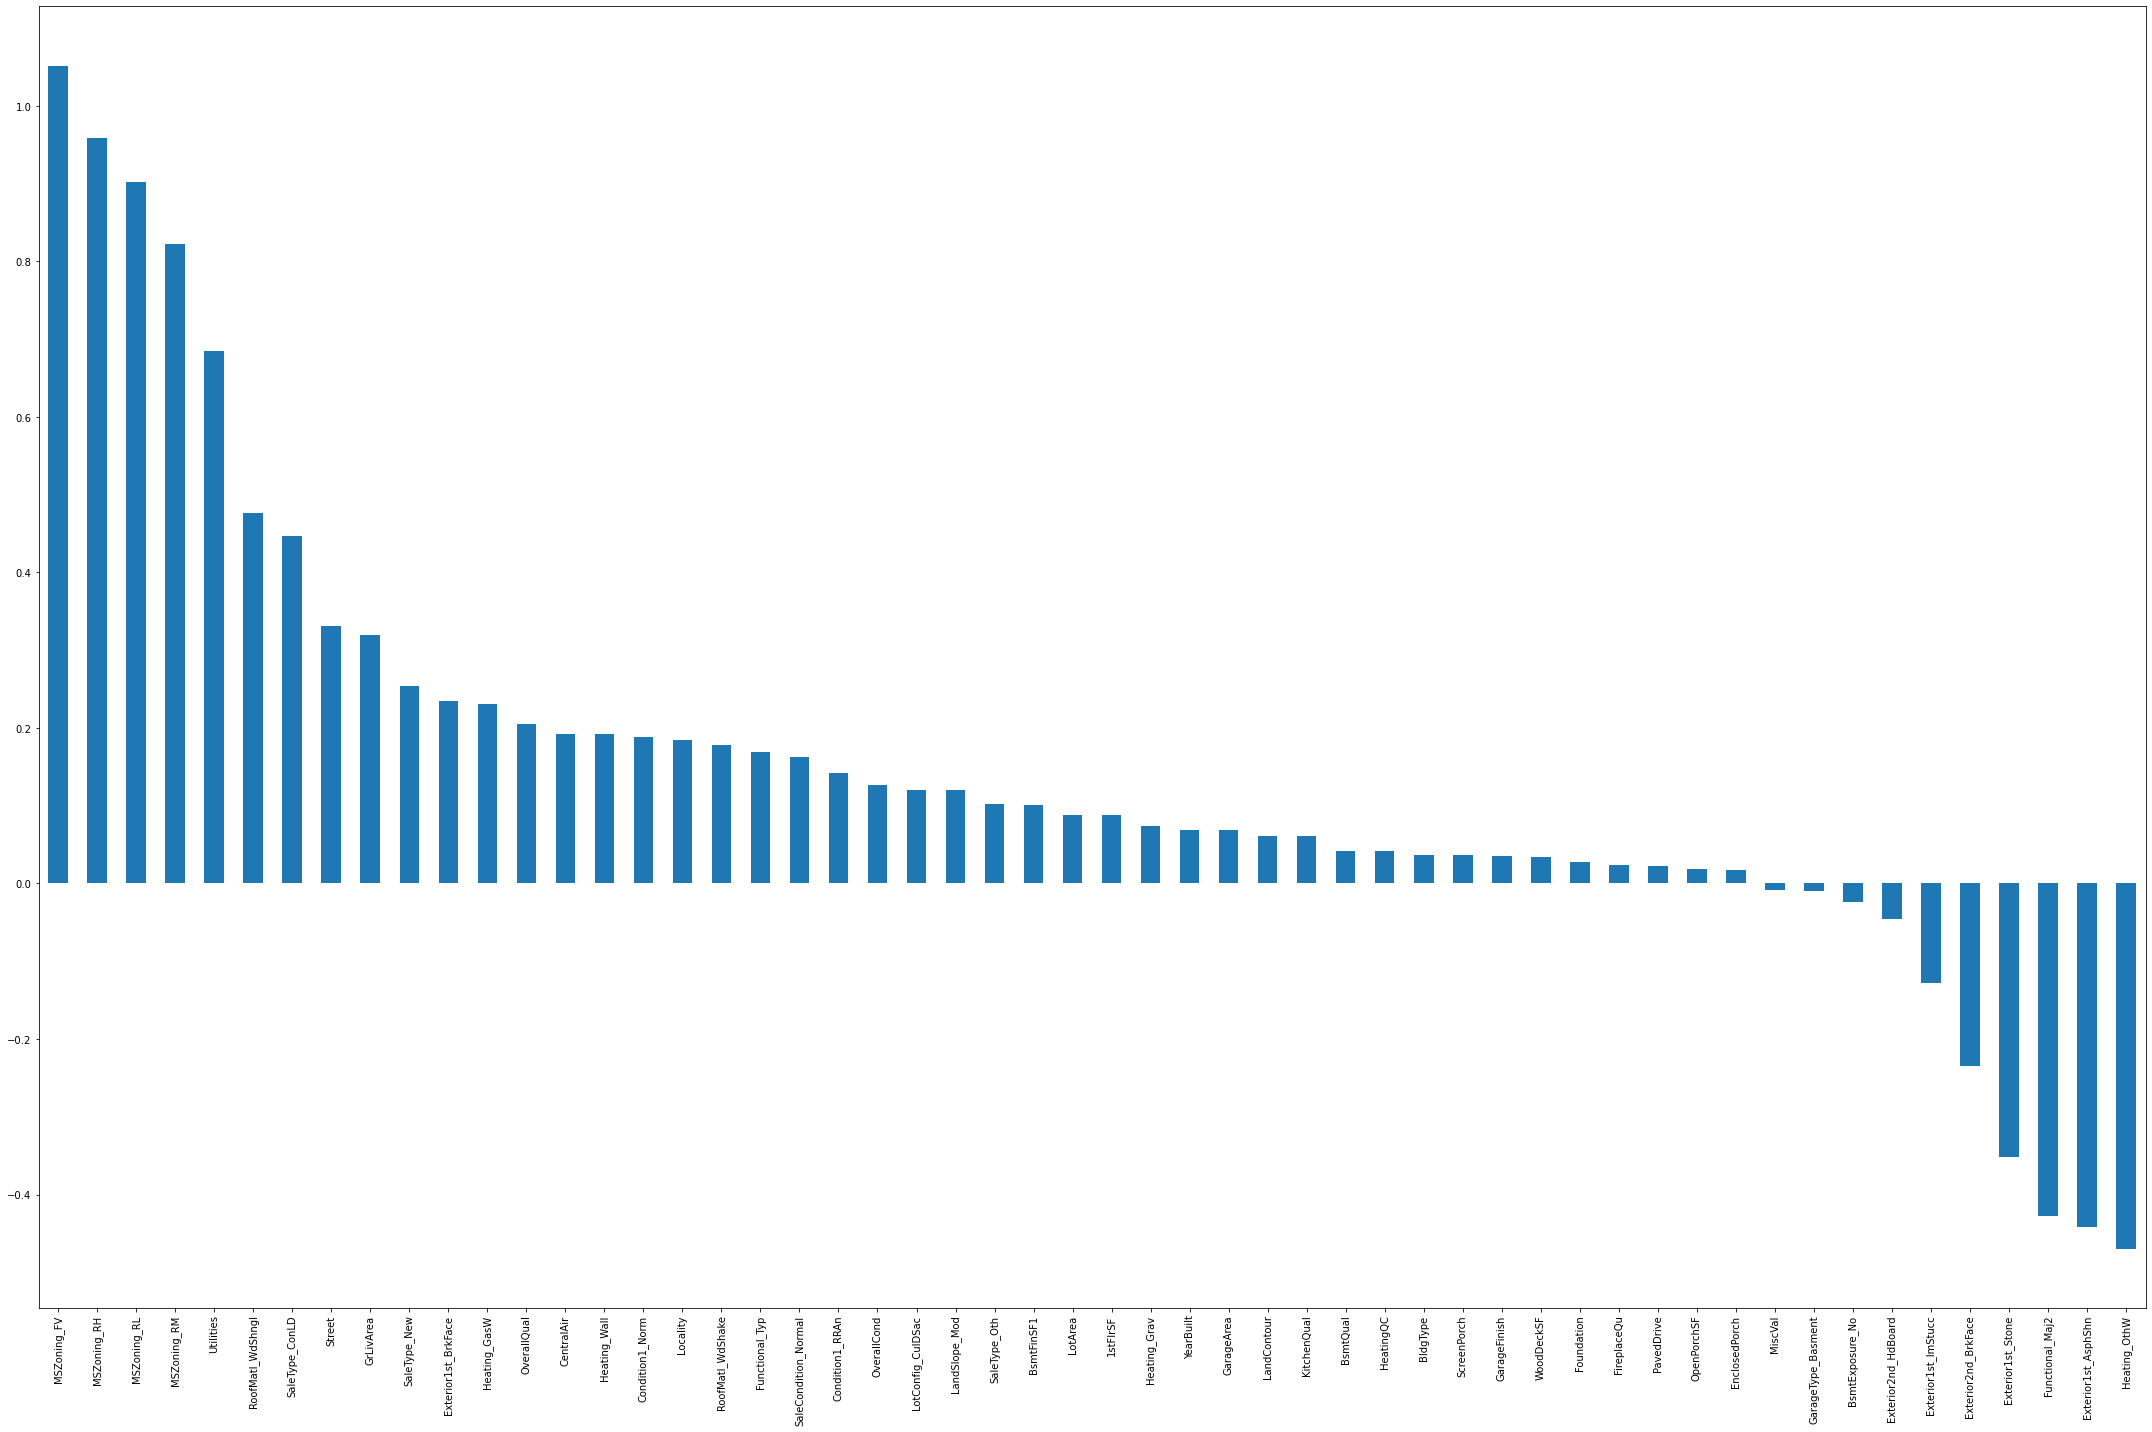

In [256]:
plt.figure(figsize = [30,20])
pd.Series(lr2.coef_ , X1.columns).sort_values(ascending = False).plot(kind = 'bar')
plt.tight_layout()
plt.show()

#### We see the Locality Parameters are most influential predictors for Pricing, followed by the house utilities and other features such as heating quality, basement facilities etc.

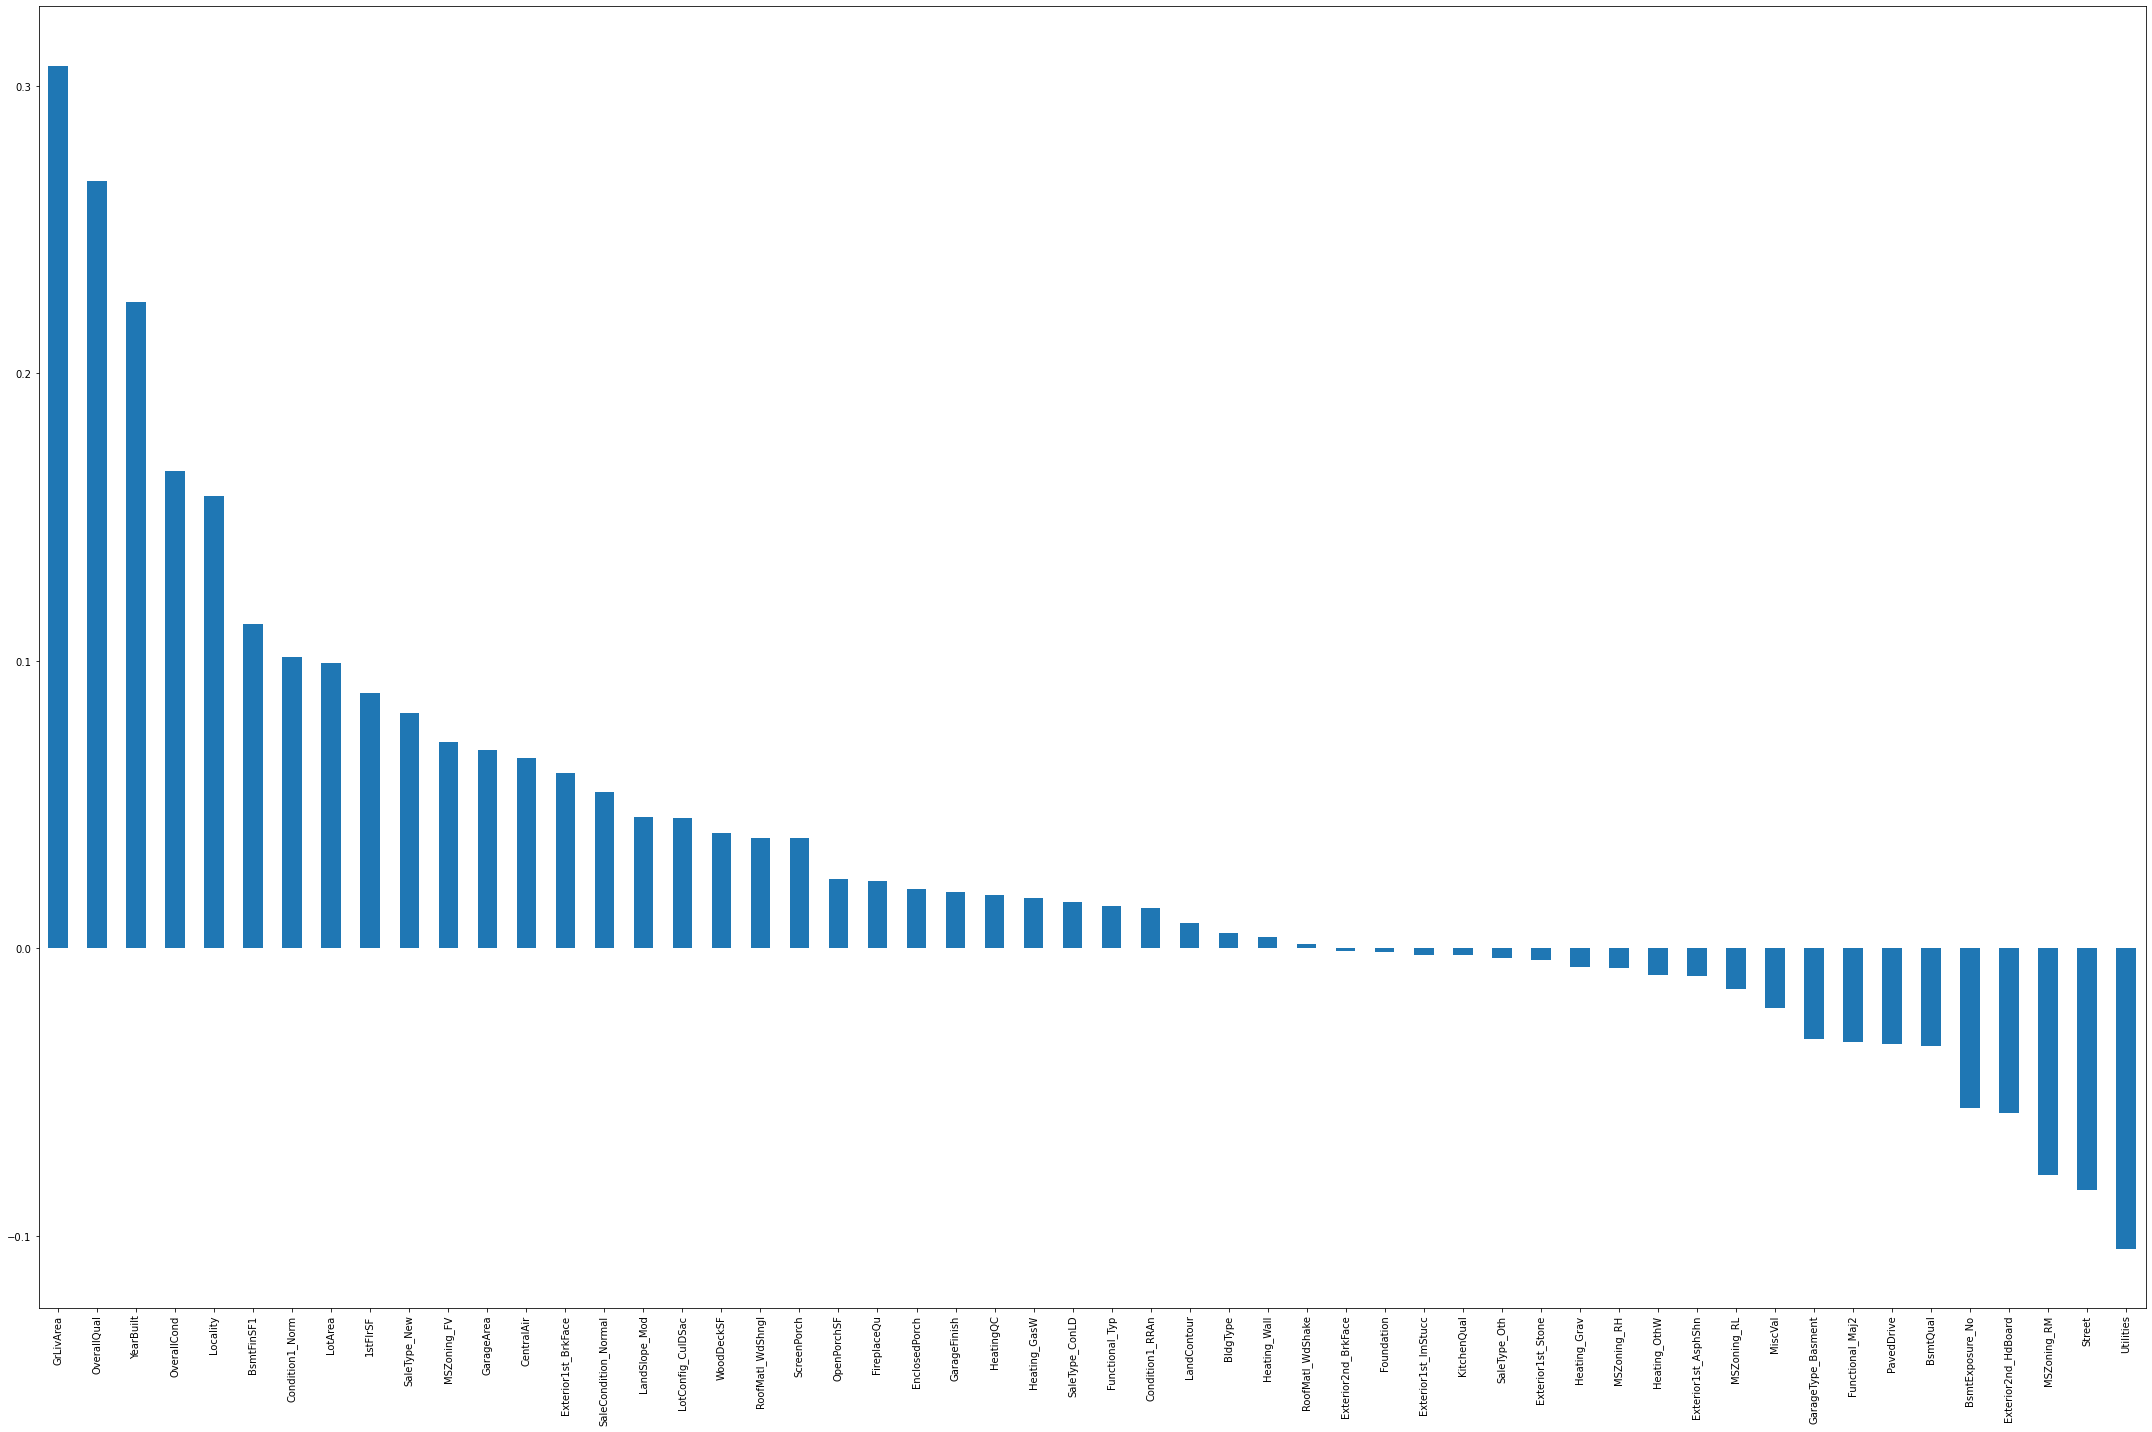

In [257]:
plt.figure(figsize = [30,20])
pd.Series(sgd2.coef_ , X1.columns).sort_values(ascending = False).plot(kind = 'bar')
plt.tight_layout()
plt.show()

### We see better feature significance corresponding to realistic attributes in the tuned SGD, as features like Lving Area,Overall House Quality,Year Built,Feature Engineered - Locality followed by other House Features like Central Air Conditioning, BaseMent Facilities etc. hold further relevance for predicting the Sales Price for the respective Houses.

## Cross - Validating Desired Models

In [258]:
models = [('LR_SFS',lr2),
         ('SGD_SFS',sgd),
         ('SGD_tuned',sgd2)]

LR_SFS: 0.897241 (0.036120)
SGD_SFS: 0.870211 (0.041525)
SGD_tuned: 0.881187 (0.038063)


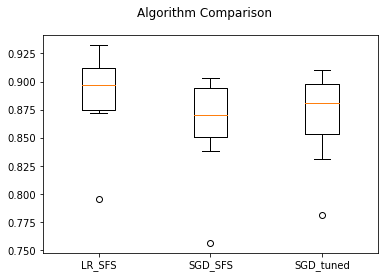

In [259]:
from sklearn import model_selection

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x1_train, y1_train, cv=kfold,scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
    print(msg)

    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()